In [2]:
#Bibliotecas que podem ser uteis
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import latexify
import random
import datetime as dt
from pandas_datareader import data as pdr
from numpy import linalg as LA
import yfinance as yf

# An√°lise estat√≠stica
### A base de tudo 

_Thiago Laidler Vidal Cunha_

## Planejamento 

    1 - M√©todos cient√≠fico 
    2 - Cuidado com estat√≠stica descritiva e descri√ß√µes enganosas 
    3 - Probabilidade B√°sica + Bayes + problemas com probabilidade 
    4 - Distribui√ß√µes + teorema do limite central
    5 - Correla√ß√µes + M√©todos
    6 - Como modelar dados e estimar par√¢metros. (Regress√£o linear, Chi quadrado e Monte Carlo)

# 1)
## O m√©todo cient√≠fico

O m√©todo cient√≠fico √© um conjunto de normas que orientam a produ√ß√£o do conhecimento cient√≠fico. √â preciso juntar evid√™ncias emp√≠ricas verific√°veis, baseadas na observa√ß√£o de experimentos de maneira sistem√°tica e controlada. Com isso, podemos analisar as evid√™ncias com o uso da l√≥gica e utiliz√°-las para refutar ou comprovar diferentes teorias cient√≠ficas. √â atrav√©s do m√©todo cient√≠fico que podemos explorar o mundo ao nosso redor de forma coerente e informativa.

Na an√°lise das evid√™ncias emp√≠ricas no m√©todo cient√≠fico, a estat√≠stica tem um papel fundamental. Ela √© respons√°vel por coletar, organizar, analisar e interpretar dados, permitindo que as conclus√µes retiradas das evid√™ncias sejam mais precisas e confi√°veis. Al√©m disso, a estat√≠stica √© amplamente utilizada em diversas √°reas do conhecimento, desde a **astrof√≠sica** at√© o **mercado financeiro**.

Para aqueles que desejam se aprofundar em estat√≠stica, existem diversas op√ß√µes de materiais did√°ticos dispon√≠veis, como as refer√™ncias bibliogr√°ficas que utilizei para escrever esse artigo (uma delas √© o cl√°ssico livro "Estat√≠stica B√°sica", de Bussab e Morettin), al√©m de cursos online (em breve, planejo gravar um). No entanto, √© minha sincera esperan√ßa que este material o auxilie a compreender melhor este assunto t√£o fascinante.

√â importante ressaltar que este artigo deve ser utilizado como *complemento* ao estudo e n√£o como a √∫nica fonte de informa√ß√µes, j√° que falta explora√ß√µes e desenvolvimentos mais detalhados ao longo das explica√ß√µes. O objetivo √© apenas facilitar a compreens√£o e organizar as partes que julguei mais importantes para qualquer profissional que trabalhe com dados.

Espero que goste.

# 2)
## Cuidados com estat√≠stica descritiva e descri√ß√µes enganosas!
 - A m√©dia, a mediana e suas simplifica√ß√µes 
 
A partir de uma base estat√≠stica bem consolidada, e uma curiosidade em explorar o mundo (que todo cientista tem ou deve ter), podemos explorar quest√µes interessantes que, aparentemente, n√£o est√£o relacionadas. 

Por exemplo, (1) Qual a situa√ß√£o da sa√∫de econ√¥mica da classe m√©dia hoje?; e (2) quem foi o maior jogador de beisebol de todos os tempos?
    
    (1) Essa pergunta √© vital para a pol√≠tica de qualquer pa√≠s. O bem-estar financeiro desse grupo tende a ser um indicador fundamental da sa√∫de econ√¥mica de uma na√ß√£o. 
    (2) Essa pergunta √© trivial. No entanto, assim como a primeira, nos √© √∫til para ilustrar as for√ßas e limita√ß√µes da estat√≠stica descritiva (n√∫meros e c√°lculos que usamos para sintetizar dados brutos).
    
Podemos tentar demonstrar que Derek Jeter √© um grande jogador de beisebol ao descrever cada rebatida em cada jogo da Major League que ele jogou (dados brutos muito dificeis de se analisar, tendo em vista que Jeter jogou por aproximadamente dezessete anos), ou podemos calcular que ao final da temporada de 2011, Jeter teve uma m√©dia de rebatidas na carreira de 0,313. Essa √© uma estat√≠stica descritiva.

Acontece que a **m√©dia** de rebatidas √© uma simplifica√ß√£o grosseira das dezessete temporadas de Jeter. Os especialistas em beisebol possuem um bando de estat√≠sticas descritivas que consideram mais valiosas do que a m√©dia de rebatidas. Ainda assim, idealmente, gostar√≠amos de achar o equivalente econ√¥mico da m√©dia de rebatidas, ou algo ainda melhor. Queremos uma _medida simples e precisa_ de como o bem-estar econ√¥mico do trabalhador t√≠pico tem mudado nos √∫ltimos anos. Uma tentativa razo√°vel seria calcular a mudan√ßa na renda per capita no decorrer de uma gera√ß√£o, (aproximadamente trinta anos). A renda per capita √© uma m√©dia simples: renda total dividida pelo tamanho da popula√ß√£o. Por essa medida, a renda m√©dia no Brasil subiu de 3.100 dolares em 1990 para 6.796,84 dolares em 2020.
    
    H√° um problema. O c√°lculo est√° tecnicamente correto, mas totalmente errado em termos da nossa interpreta√ß√£o. Al√©m da n√£o corre√ß√£o pela infla√ß√£o (3.100 dolares em 1990 equivalem a 6.324,54 dolares em 2020), a renda m√©dia do Brasil n√£o √© igual a renda do brasileiro m√©dio!

A renda per capita pega meramente toda a renda ganha no pa√≠s e a divide pelo n√∫mero de pessoas, o que n√£o nos informa muita coisa. Um crescimento explosivo na renda do top 1% da pir√¢mide social pode aumentar significativamente a renda per capita sem que nenhum centavo a mais entre no bolso do restante da popula√ß√£o. 
    
> Do beisebol √† renda √† astrof√≠sica, a tarefa b√°sica quando se trabalha com dados √© sintetizar uma grande dose de informa√ß√£o. H√° cerca de 200 milh√µes de habitantes no Brasil, e uma planilha poderia armazenar o nome e hist√≥rico de renda de cada indiv√≠duo. Poder√≠amos ter acesso total √† informa√ß√£o que desejamos sobre a sa√∫de econ√¥mica do pa√≠s. Todavia, seria tamb√©m t√£o dif√≠cil de manejar que n√£o nos diria absolutamente nada. No trabalho como astr√¥nomos precisamos lidar com quantidade gigantescas de dados, e ca√≠mos na mesma problem√°tica.
    
    
    
    

Ou seja, para tornar os dados √∫teis, escolhemos simplificar. Realizamos c√°lculos para reduzir um complexo arranjo de dados e um punhado de n√∫meros que descrevam esses dados, exatamente da mesma forma que sintetizamos uma complexa e multifacetada performance de dan√ßa com um n√∫mero: 9,8.

> A estat√≠stica descritiva nos d√° um resumo manej√°vel e significativo dos fen√¥menos, no entanto, **qualquer simplifica√ß√£o convida ao abuso.** 

Voltando √° an√°lise da renda per capita, vemos claramente que calcular a **m√©dia** de um grupo pode n√£o ser o ideal. Se em um grupo de 9 trabalhadores, com renda m√©dia de 2.000 reais por m√™s, se encontram num bar com um amigo rico, com renda de 50.000 reais por m√™s, o ganho m√©dio do grupo de 10 amigos sobe, sem que os trabalhadores recebam mais. Por essa raz√£o, temos outra estat√≠stica que tamb√©m sinaliza o 'meio' de uma distribui√ß√£o: a **mediana**.

    A mediana √© o ponto que divide uma distribui√ß√£o ao meio (em que metade das observa√ß√µes jaz acima e a outra metade abaixo). No caso dos amigos no bar, mesmo que entre mais um amigo rico, a mediana n√£o ir√° se alterar (e ser√° o valor de 2000 reais).
> Para distribui√ß√µes sem valores at√≠picos s√©rios, a **mediana** e a **m√©dia** ser√£o semelhantes. 

A mediana √© interessante nesses casos de problemas _lim√µes_ (termo popularizado por economistas que analisavam mercado de carros usados), em que alguns valores at√≠picos inflam a m√©dia, mas n√£o a mediana. 

> Nem a mediana, nem a m√©dia s√£o dif√≠ceis de calcular; a chave √© determinar que medida do 'meio' √© mais acurada (proxima do ideal) numa situa√ß√£o particular. 


- Outras estat√≠sticas descritivas:

A mediana tem alguns correspondentes √∫teis, podemos dividir a distribui√ß√£o pela metade, em **quartis** *(cada um sendo um recorte de 25% da distribui√ß√£o)* ou em **decis** *(cada um sendo um recorte de 10%)*. Note que estamos explorando conceitos _relativos_ (se analisamos a performance de um aluno, a dificuldade da prova pode ser relevada j√° que seu resultado final √© comparado ao restante da turma) em contraste com valores _absolutos_ (a nota tirada na prova, independente de qual foi a performance alheia).

Outra estat√≠sitca que pode nos ajudar a descrever o que de outro modo poderia ser apenas um juntamento de n√∫meros √© o **desvio padr√£o** (medida de como os dados se dispersam em rela√ß√£o √† m√©dia). 
> O quanto elas est√£o espalhadas?

$DP^{2} = \sum_{i=1}^{N} \frac{(x_{i} - \tilde{x})^2}{n}$

 Suponhamos que coletassemos dados sobre o peso de 250 pessoas num avi√£o com destino a S√£o Paulo e tamb√©m levantasse o peso de uma amostra de 250 qualificados para a Maratona de Niter√≥i. 
 
 Agora, suponha que o peso m√©dio para ambos os grupos seja aproximadamente o mesmo, digamos setenta quilos (sabendo que, no mesmo v√¥o, teremos pessoas que precisar√£o ocupar quase duas poltronas inteiras, assim como alguns beb√™s de colo e crian√ßas malcriadas).
 
Com base nas ferramentas descritivas introduzidas at√© aqui, **os pesos dos passageiros do avi√£o e dos maratonistas s√£o quase identicos, mas n√£o s√£o!** Sim, os pesos ter√£o o mesmo 'meio', mas os passageiros do avi√£o t√™m uma dispers√£o muito maior em torno do ponto m√©dio. Os pesos dos passageiros estar√£o mais 'espalhados' enquanto os maratonistas parecer√£o pesar mais ou menos a mesma coisa. 
> O desvio padr√£o √© a estat√≠stica que nos permite atribuir valor a essa dispers√£o em torno da m√©dia. 

Uma vez que conhe√ßamos a **m√©dia**, a **mediana** e o **desvio padr√£o** para qualquer conjunto de dados, teremos em m√£os algum resultado intelectual s√©rio. 

- Distribui√ß√£o Normal

Sabendo disso, faz-se um bom momento para introduzirmos o conceito de **distribui√ß√£o normal**. Dados distribu√≠dos normalmente s√£o sim√©tricos em torno de sua m√©dia, num formato de sino.

    A distribui√ß√£o normal descreve v√°rios fen√¥menos comuns, como a distribui√ß√£o de frequ√™ncia com a qual as pipocas estouram numa panela (aos poucos a quantidade de caro√ßos estourando vai aumentando at√© um m√°ximo, e em seguida torna a cair na mesma propor√ß√£o que aumentou). As alturas das pessoas t√™m uma distribui√ß√£o mais ou menos normal, o que significa que s√£o aproximadamente sim√©tricas em torno de 1,70 metros. 

As *estat√≠sticas descritivas* nos d√£o a percep√ß√£o de fen√¥menos que nos importam. Nesse esp√≠rito, podemos voltar a explorar sobre a sa√∫de econ√¥mica da classe m√©dia brasileira.

Para avaliar isso, podemos examinar as mudan√ßas no sal√°rio mediano (corrigido pela infla√ß√£o) durante as √∫ltimas d√©cadas, assim como avaliar os sal√°rios no 25¬∞ e 75¬∞ percentis (razoavelmente limites inferior e superior da classe m√©dia). 

Al√©m disso, devemos nos atentar na avalia√ß√£o da renda ou sal√°rios (um √© a soma de todos os pagamentos de diferentes fontes, enquanto o outro √© aquilo que √© pago pelo trabalho). Um trabalhador que pegue outro trabalho ir√° aumentar sua renda, mas talvez n√£o tenha aumento de sal√°rio. Se os indiv√≠duos precisam trabalhar mais para ganhar mais, √© dif√≠cil avaliar o efeito geral sobre seu bem-estar.

> Ideia de projeto: buscar os dados de sal√°rios nas √∫ltimas tr√™s d√©cadas e analisar sua evolu√ß√£o em cada quartil (plotar real x tempo)

- Descri√ß√µes podem ser enganosas!

 Embora o campo da estat√≠stica esteja enraizado na matem√°tica, o uso da estat√≠stica para descrever fen√¥menos complexos n√£o √© exato. Isso deixa uma boa brecha para obscurescer a verdade. 
 > S√≥ h√° tr√™s tipos de mentiras: mentiras, mentiras deslavadas e estat√≠sticas. Mark Twain (humorista)

J√° que h√° in√∫meras maneiras de descrever o mesmo fen√¥meno usando a estat√≠stica, a descri√ß√£o que escolhemos usar (ou n√£o usar) ter√° profundo impacto sobre a impress√£o que deixamos. 

O primeiro cuidado √© a diferenciar **precis√£o** e **acur√°cia**: precis√£o reflete o grau de exatid√£o da nossa medida, enquanto a acur√°cia √© a medida da consist√™ncia geral de um n√∫mero com a verdade. 
> Posso apontar para uma pessoa perdida pela cidade, que siga 3,15 km a leste para encontrar o posto mais pr√≥ximo. A indica√ß√£o √© muito precisa, mas pode n√£o ser acurada (digamos que o posto se encontra ao norte) e ela se perder ainda mais.

A precis√£o pode mascarar a inacur√°cia, dando-nos um falso senso de certeza.
> Como ocorreu com Joseph McCarthy, senador anti-comunista americano que, na d√©cada de 50, agitou ao ar uma folha de papel e declarou "Tenho aqui na minha m√£o uma lista de 205 nomes que foram informados ao secret√°rio de Estado como sendo membros do Partido Comunista e que mesmo assim ainda est√£o trabalhando e elaborando pol√≠ticas no Departamento de Estado." Descobriu-se mais tarde que o papel n√£o tinha nome algum, mas a especificidade da acusa√ß√£o deu-lhe credibilidade.

Esse tipo de erro afeta parte fundamentais da sociedade, como no exemplo dos modelos de risco de Wall Street antes da crise financeira de 2008. Seus resultados eram bem precisos. O conceito de "valor em risco" permitia √†s empresas quantificar com precis√£o a quantidade de capital da firma que podia ser perdido em diferentes cen√°rios. O problema era que os modelos ultrassofisticados eram o equivalente a calibrar nossa fita m√©trica para jardas. A matem√°tica era complexa e misteriosa. 

As respostas produzidas eram tranquilizadoramente **precisas**. Mas as premissas embutidas nos modelos sobre o que poderia acontecer aos mercados globais estavam simplesmente erradas, tornando as conclus√µes totalmente **incauradas**, a ponto de desestabilizar n√£o s√≥ o Wall Street, mas toda a economia global. 

At√© nossas velhas amigas, m√©dia e mediana, podem ser usadas com finalidade nefastas. Consideremos os cortes de imposto da era Bush nos EUA, que foram pregados como algo positivo pela administra√ß√£o da √©poca. Enquanto for√ßava o plano, a administra√ß√£o ressaltava que 92 milh√µes de americanos receberiam uma redu√ß√£o tribut√°ria m√©dia de mais de 1.000 dolares. No entanto, essa s√≠ntese n√£o estava acurada. 

Embora 92 milh√µes de americanos tenham come√ßado a pagar menos imposto, a maioria dessa gente n√£o teve um corte de cerca de 1000 dolares. O corte tribut√°rio mediano era de menos de 100 dolares. Um n√∫mero relativamente pequeno de indiv√≠duos muito ricos era eleg√≠vel para os cortes de impostos muito grandes (distorcendo a m√©dia). Nesse caso, a **m√©dia nos engana**, e a mediana nos salva devido a sua n√£o sensibilidade a valores extremos.

Obviamente, a mediana pode nos enganar tamb√©m, justamente devido a sua falta de sensibilidade. Suponha que tenhamos uma doen√ßa potencialmente fatal, cuja cura foi at√© desenvolvida, mas o rem√©dio √© extremamente caro e tem efeitos colaterais s√©rios. *Ser√° que funciona?*, perguntamos. Da√≠, temos acesso a informa√ß√£o de que h√° um aumento de duas semanas na mediana de expectativa de vida entre pacientes com a mesma doen√ßa. *Talvez a droga n√£o valha a pena...*

Contudo, nesse caso, **a mediana nos engana**! Se muitos pacientes n√£o reagem ao novo tratamento, mas que um grande n√∫mero (digamos, entre 30~40%) fica inteiramente curado, esse bom desempenho n√£o fica vis√≠vel na mediana (a expectativa de vida de pelo menos 30% dos pacientes saltou d√©cadas, mas n√£o tivemos essa informa√ß√£o). Nesse caso, pacientes at√≠picos (que melhoram e vivem bastante) s√£o muito relevantes para nossa decis√£o. 

> Portanto, a m√° conduta estat√≠stica tem muito pouco a ver com a matem√°tica malfeita. O mais importante √© temos boa capacidade de julgamento e integridade.

# 3)
## Probabilidade b√°sica e Teorema de Bayes

A probabilidade √© o estudo de eventos e resultados envolvendo um elemento de incerteza. Investir no mercado de a√ß√µes envolve incerteza. O mesmo ocorre com o lan√ßamento de uma moeda. Jogar uma moeda quatro vezes envolve n√≠veis de incerteza adiocionais. 

O conceito de probabilidade  est√° intimamente  ligado  aos  eventos rand√¥micos e √†s medi√ß√µes feitas nas mais diferentes √°reas da ci√™ncia. Como quando dizemos que a massa da Lua √© 5.0 +/- 0.3 unidades. *O que queremos dizer com isso?*

- Experimento aleat√≥rio: onde podemos descrever um conjunto de todos os resultados poss√≠veis, mas n√£o podemos dizer, a priori, qual desses resultados acontecer√°.
- Espa√ßo amostral: conjunto de todos os poss√≠veis resultados do experimento aleat√≥rio. 
- Evento: subconjunto do espa√ßo amostral.

 - O que √© probabilidade? 

$P = \frac{Evento(A)}{Espa√ßoAmostral (\Omega)} = \frac{QUERO}{TUDO}$

> Em setembro de 2011, um sat√©lite da Nasa de 6.5 toneladas estava mergulhando em dire√ß√£o a Terra e a expectativa era de que ele despeda√ßasse quando entrasse na atmosfera. Quais as chances de que algu√©m fosse atingido pelos destro√ßos? Os cientistas estimaram que a probabilidade era de uma em 21 milh√µes. 

- Sair cara no lan√ßamento da moeda: 

$ P = \frac{1}{2}$

- Ocorrer um numero par no lan√ßamento de um dado (A = {2,4,6}):

$P(A) = \frac{3}{6} = \frac{1}{2}$

- Retirar um rei de paus de um baralho completo e sem coringa:

$P = \frac{1}{52}$

- retirar um rei qualquer:

$P = \frac{4}{52}$

- Conceito frequentista:

Quando o experimento √© repetido n vezes sob mesmas condi√ß√µes. Consideramos que evento A ocorreu m vezes entre as n realiza√ß√µes do experimento. Concluimos que a m/n √© uma boa aproxima√ß√£o para a probabilidade de A caso n seja muito grande 
> Caso n√£o saibamos se a moeda utilizada est√° adulterada, e por isso n√£o podendo concluir que temos 1/2 de chance para cada face, jogamos a moeda 1000 vezes e anotamos.



In [2]:
def moedas(probabilidade=0.5,jogadas=1000):
    '''
    retorna uma array com a quantidade de sucesso/tentativa e outra com a quantidade de tentativas
    '''
    c = np.arange(1,101)
    tentativas = 0
    sucesso = 0
    suc = [] #listagem de caras acumuladas/tentativa
    tentativ = [] #listagem tentativas totais 
    for i in range(jogadas):
        if random.choice(c) <= 50:
            sucesso += 1
            tentativas += 1
            suc.append(sucesso/tentativas) #esperamos q a maioria dos numeros d√™ proximo da probabilidade
            tentativ.append(tentativas)
        else:
            tentativas += 1
    return np.array(suc),np.array(tentativ)

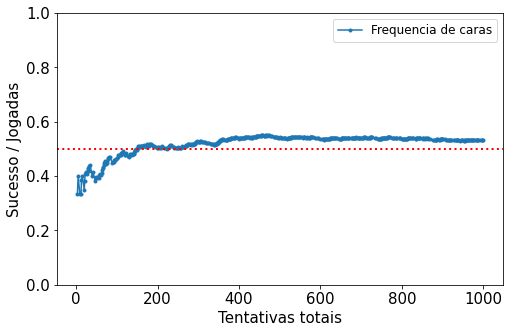

In [3]:
moeda = moedas() #1000 jogadas de moeda de 1/2 probabilidade de cair cara. 
'''
√â preciso jogar a fun√ß√£o numa variavel pois caso contrario, a cada slice estaremos chamando a fun√ß√£o novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()   

Aumentando o numero de tentativas e observando a maior estabilidade do gr√°fico


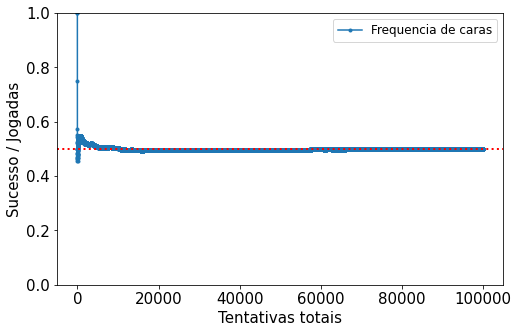

In [4]:
moeda = moedas(probabilidade = 0.5, jogadas = 100000)
'''
√â preciso jogar a fun√ß√£o numa variavel pois caso contrario, a cada slice estaremos chamando a fun√ß√£o novamente 
e comparando o sucesso e tentativas de casos distintos.
'''
plt.figure(figsize = [8,5])
plt.plot(moeda[1],moeda[0], '.-', label='Frequencia de caras')
plt.legend(fontsize = 12)
plt.ylim(0, 1.0)
plt.ylabel('Sucesso / Jogadas', fontsize=15)
plt.xlabel('Tentativas totais', fontsize=15)
plt.axhline(0.5, color='r', linestyle='dotted', linewidth=2) # ponto de estabilidade
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print('Aumentando o numero de tentativas e observando a maior estabilidade do gr√°fico')
plt.show()   

> Perceba que o ponto de estabilidade coincide com o que sabemos da probabilidade da moeda dar cara (50%) ao usarmos o conceito cl√°ssico de probabilidade no espa√ßo amostral finito uniforme {cara,coroa}.

**O conceito frequentista de probabilidade √© mais abrangente do que o cl√°ssico**, j√° que tamb√©m se aplica em espa√ßo amostral n√£o finito uniforme. No entanto, *embora o conceito frequentista nos forne√ßa uma forma de medir na pr√°tica a probabilidade de ocorr√™ncia de um determinado evento, sua aplicabilidade tamb√©m n√£o √© t√£o ampla como gostar√≠amos*.

Perceba que haver√£o casos em que poderemos atribuir um valor √† probabilidade de algo ocorrer (como o caso da moeda honesta), pois n√£o encontraremos motivos para atribuir maior probabilidade a um evento do que outro. No entanto, haver√£o outros em que isso n√£o ser√° poss√≠vel, nos restando apenas a **determina√ß√£o emp√≠rica** desse valor (*tentativa e erro + extrapolar para numeros grandes e ver o ponto de estabilidade*).

Temos tamb√©m que a soma de todas as probabilidade do espa√ßo amostral tem 100% de ocorrer ($P(\Omega) = 1$). E qualquer probabilidade de algum evento deve girar entre 0 e 1.

- Eventos mutuamente exclusivos:

$P(A ou B) = P(A) + P(B)$

- No caso geral:

Temos que descontar dessa soma a probabilidade de A e B ocorrerem simultaneamente.

$P(A ou B) = P(A) + P(B) - P(A e B)$

**OBS**: 

>Quando n√£o existe depend√™ncia entre eventos A e B, podemos usar a regra do *E*:
$P(A e B) = P(A) \times P(B)$

>Quando A e B s√£o eventos *mutamente exclusivos* (n√£o podem ocorrer simultaneamente), podemos usar a regra do *OU*:
$P(A ou B) = P(A) + P(B)$

Esse c√°lculo surge quando queremos conhecer a chance de ocorr√™ncia de um dentre dois acontecimentos. *Se um evento pode ter diferentes resultados poss√≠veis, A,B,C e assim por diante, a possibilidade de que A ou B ocorram √© igual √† soma das probabilidades individuais de A e B, e a soma de todos os resultados poss√≠veis (A,B,C...) √© igual a 1 (100%).* Su·πïonhamos que uma funcion√°ria de uma companhia a√©rea precise supor a probabilidade de que dois passageiros se apresentem para viajar ou de que nenhum deles o fa√ßa, nesse caso ela deve somar a probabilidades.  Isso explica a **regra do 'ou'**. 

Perceba tamb√©m que a **regra do 'e'** serve para os casos em que devemos multiplicar as probabilidades. O que torna cr√≠vel a regra de *quando dois eventos poss√≠veis A e B s√£o independentes, a probabilidade de que A e B ocorram √© igual ao produto de suas probabilidades individuais*, √© a l√≥gica. Suponha que uma pessoa casada tenha, em m√©dia, uma chance de aproximadamente 1/50 de se divorciar a cada ano. Por outro lado, um policial tem uma chance de aproximadamente 1/5000 de morrer em servu√ßo. Qual a probabilidade de que um policial casado se divorcie e morra no mesmo ano? Obviamente n√£o se trata de eventos independentes, mas perceba que caso fossem, a probabilidade seria simplesmente 1/5000 x 1/50 = 1/250.000 (esse calculo n√£o funciona pois, infelizmente, depois de morrer n√£o h√° como se divorciar). No entanto, suponha que tenhamos um baralho composto de 100 perfis masculinos de um servi√ßo de relacionamento online. Cada perfil √© composto por uma pequena lista de informa√ß√µes, como se √© sincero (sim ou n√£o) e bonito (sim ou n√£o). Consideremos um bom candidato a alma g√™mea algu√©m que consiga cumprir com ambas quest√µes. Suponha que 1 de cada 10 perfis tenha 'sim' para cada uma das categorias. Quantos candidatos sobreviver√£o ao filtro de alma gemea? Bem, se cada 1/10 dos homens s√£o sinceros, 10 dos 100 passar√£o no teste. Desses 10 homens, quantos ser√£o bonitos? Novamente 1/10. Isso faz com que o resultado final seja 1/100 = 1/10 x 1/10. 

 √â extremamente valioso saber a probabilidade da ocorr√™ncia de m√∫ltiplos eventos. Quais as chances de faltar eletricidade e o gerador n√£o funcionar? Quando os eventos s√£o independentes, a probabilidade de ocorrer ambos √© o produto das respectivas probabilidades. A probabilidade de dar tr√™s caras seguidas acaba sendo 1/8, a probabilidade de quatro caras √© 1/16. Por isso os avisos de cadastro em redes sociais lhe avisa para aumentar a qualidade da sua senha. Uma senha com apenas seis digitos num√©ricos pode ser calculado por $10^6$, podendo ser facilmente calculado por um computador. No entanto, ao adicionar letras e simbolos em cada digito provavel, temos que cada caracter possui 36 possibilidades, aumentando a quantidade de senhas poss√≠veis para $36^6$.
 
 Se supomos que estejamos interessados na probabilidade de que um evento ocorra ou outro (novamente INDEPENDENTES), teremos que sua probabilidade consiste em sua soma simples. Por exemplo, a probabilidade de dar 1, 2 ou 3 com um √∫nico lan√ßamento de dado √© a soma das probabilidade individuais 1/6+1/6+1/6 = 1/2.

- A chance de n√£o correr:

$P = 1 - P(A)$



- Condicional e independencia de eventos:


Dado os eventos A e B:

$P(B|A) = \frac{P(AeB)}{P(A)}$ , se P(A) > 0.

Ora, isso faz sentido. Dado que A ocorreu, todo o espa√ßo amostral ser√° composto pelos elementos de A. N√£o s√≥ isso, se A ocorreu, os unicos elementos de B poss√≠veis de acontecer s√£o aqueles que s√£o comuns √† A. 

Perceba que caso A esteja contido em B, (A e B) = A, (A ou B) = B, ent√£o $P(A|B) = P(A)/P(B)$. $P(B|A) = 1$.

Pela defini√ß√£o de probabilidade condicional temos:

$P(A e B) = P(A|B)\times P(B) = P(B|A)\times P(A)$

Tamb√©m chamado de **Teorema de Bayes**.

Analisando com aten√ß√£o o Teorema, vemos que o fato de sabermos que o evento B ocorreu de fato pode alterar nossas expecitativas sobre A e, quando se trata de probabilidades condicionais, ele nos permite inverter a ordem dos condicionamentos. 

Note que se A e B s√£o eventos independentes e tais que P(A) > 0 e P(B) > 0, ent√£o P(A|B) = P(A) e P(B|A) = P(B) e, portanto, saber que B ocorreu n√£o altera nossas expectativas nesse caso. 

Vale-se enfatizar que a teoria bayesiana √© baseada em probabilidades *a priori* ‚Äì incondicionais atribu√≠das a um evento, na **falta de conhecimento ou informa√ß√£o que suporte sua ocorr√™ncia ou aus√™ncia** ‚Äì e em *a posteriori* ‚Äì condicionais de um evento, **devido a alguma evid√™ncia**. 

- O caso mais interessante de aplica√ß√£o deste teorema √© o do **diagn√≥stico de uma doen√ßa rara**: 

Perceba que, caso haja uma doen√ßa rara tal que afete apenas 0,1% da popula√ß√£o, ser√° necess√°rio tamb√©m um teste para identifica-la. Imagine que o teste possua 99% de precis√£o, de tal forma que apenas 1% dos testes s√£o incorretos (falso positivo ou falso negativo). O teorema de Bayes nos mostrar√° que, nesse caso, ter apenas um teste positivado √© muito pouco para afirmar que o paciente possui a doen√ßa. Isso pois, a quantidade de pessoas que n√£o ter√£o a doen√ßa, mas que positivar√£o (falso positivo), ser√° maior que a quantidade de pessoas doentes e positivadas (verdadeiro positivo). 

Ora, imagine uma popula√ß√£o de 10009 pessoas, de forma a termos 10 doentes e 9999 n√£o doentes. Se o teste tem 99% de efic√°cia for aplicada entre os 9999 saud√°veis, 1% receber√° o teste positivado, ou seja, cerca de 99,99 pessoas com resultados errados. Enquanto isso, entre os 10 doentes, uma m√©dia de 9,9 teriam o resultado positivado (99% de acerto). Isso significa que, dentre todos os que receberam o resultado POSITIVO, a probabilidade de encontrarmos o doente √© de 9,9/109,9 $\approx 9%$. 

Perceba que √© o mesmo que pedirmos para calcular a probabilidade do paciente estar doente dado que fora positivado num teste de 99% de precis√£o. Calculo este, previsto pelo teorema de Bayes. 

$P(Doen√ßa|Positivo) = \frac{P(D e P)}{P(P)} \approx 9/100$

>> Perceba a importancia de definir a teoria bayesiana em bases a prioristicas na falta de conhecimento emp√≠rico. Se fiz√©ssemos um levantamento estatistico de pessoas doentes e saudaveis, n√£o ter√≠amos 99,99 pessoas com testes positivados, muito menos um espa√ßo amostral quebrado como 109,9 pessoas. No entanto, verificar√≠amos um caso similar √†quele visto no calculo probabilistico da moeda. Ou seja, a estat√≠stica frequentista se aproximando do c√°lculo a priori conforme aumentamos a amostra.

 - No geral

Dados eventos A e B no mesmo espa√ßo amostral:

$P(A ou B) = P(A) + P(B) - P(A e B)$

(Quando A e B n√£o tem elementos em comum, P(A e B) = 0). Ora, faz sentido. Se queremos calcular a chance de ocorrer A **ou** B, n√£o queremos considerar a probabilidade de ambos ocorrerem simultaneamente.

A probabilidade tamb√©m nos possibilita calcular o que pode ser a ferramenta mais √∫til em toda tomada de decis√£o: o **valor esperado**. Tamb√©m chamado de *payoff* de algum evento, se trata da soma de todos os diferentes resultados, cada um pesado pela sua probabilidade. Por exemplo, o pre√ßo de um bilhete de loteria √© calculado para estar acima do valor esperado, pois assim, em larga escala, a banca vence. Veja:

Suponha que voc√™ seja convidado a participar de um jogo que rola um √∫nico dado. O pr√™mio desse jogo √© de 1 real se voc√™ tirar 1, 2 reais se tirar 2, 3 reais se tirar 3 e assim por diante. Qual o valor esperado para um √∫nico lance desse dado? Seguindo o que vimos at√© aqui, cada resultado poss√≠vel tendo 1/6 chance de ocorrer, mas cada face ter√° um peso diferente (seu valor em reais). Portanto:

$1/6 \times (1) + 1/6 \times (2) + 1/6 \times (3) + 1/6 \times (4) + 1/6 \times (5) + 1/6 \times (6) = 21/6 = 3,5$

Isso significa que pagar menos de 3,50 reais para jogar um dado ser√° um bom investimento, afinal, o valor esperado de retorno √© 3,50 (em larga escala). O que ocorre nos cassinos e loterias, √© que o valor vendido √© muito acima do ganho esperado (nesse caso, uma rodada no dado custaria 5 reais). Isso significa que a chance de perda √© muito maior que a de ganho, e ao longo do tempo (ou ao longo da quantidade de jogadores) a banca vence. Esse calculo n√£o garante que voc√™ ir√° ganhar ou perder dinheiro jogando um vez, mas ajuda a esclarecer quais s√£o os riscos que valem a pena correr.

E o que significa esse *valor esperado*? Em casos de uma distribui√ß√£o normal ou vari√°vel aleat√≥ria, ser√° nossa **m√©dia** ou **esperan√ßa**.

##### T√©cnica de contagem

 - Para sabermos calcular a probabilidade de um evento ocorrer se faz necess√°rio saber contar quantos eventos poss√≠veis s√£o capazes de acontecer.
 
Em pequena escala (como jogar *uma* moeda *uma* vez), essa contagem √© f√°cil (cara ou coroa, dois eventos poss√≠veis). Se temos **2 eventos poss√≠veis** e queremos saber apenas **uma possibilidade** (por exemplo, a chance de cair *cara*), partindo do princ√≠pio de que n√£o haja nenhum motivo para que um evento seja mais prov√°vel que o outro, teremos que nossa probabilidade de tirar cara ser√° p= 1/2 = 50%. Uma possibilidade dentre duas, faz sentido.
 
Em larga escala, por√©m, se faz necess√°rio contar **todos** os eventos poss√≠veis (no caso da moeda, o total pode ser 2 eventos poss√≠veis elevado a quantidade de jogadas). Se queremos saber, por exemplo, qu√£o prov√°vel √© de se conseguir tirar *6 caras ao jogar 6 vezes*, √© necess√°rio saber **contar** todas as possibilidades de se conseguir *qualquer resultado* em 6 jogadas. Assim, tendo em mente que: 
 
 **(I)** Queremos saber, dentre $2^{N¬∞ jogadas} = 2^{6}$ possibilidades, quantas dessas temos 6 caras seguidas, e 
 **(II)** Saber que s√≥ h√° 1 possibilidade; 
 
 Teremos o necess√°rio para calcular nossa probabilidade. $p= 1/2^{6}$.
 
Pode parecer contraintuitivo pensarmos assim, pois, j√° que os eventos s√£o independentes, poder√≠amos utilizar a regra do "**E** equivalente √† **Vezes**" (vista anteriormente) e chegar no mesmo valor para qualquer possibilidade possivel $ p = 1/2 \times 1/2 \times 1/2 \times 1/2 \times 1/2 \times 1/2 = 1/2^{6}$ = Jogada1 **E** jogada2 **E** Jogada3 **E** Jogada4 **E** Jogada5 **E** Jogada6. Ou seja, a chance de cair 6 caras teria a mesma chance de cair 5 caras e 1 coroa, que teria a mesma chance de cair 4 caras e 2 coroas, e assim por diante. N√£o parece certo, mas est√°! 

Bem, est√° correto, mas n√£o do jeito que est√° pensando. O calculo acima est√° correto para qualquer possibilidade **se levarmos em conta a ordem**. O fato dos eventos serem independentes (ou seja, n√£o h√° motivo para que haja mais chance de cair coroa do que cara, e vice-versa), faz com que a possibilidade de *qualquer* evento seja o mesmo. Mas quando estamos nos questionando **Qu√£o mais prov√°vel √© cair 3 caras em 6 jogadas do que 6 caras?** n√£o estamos querendo levar em conta a ordem! O que queremos fazer √© pegar todas as possibilidades (o que houve 3 caras e 3 coroas, 2 caras e 4 coroas, 4 caras e 2 coroas...) e som√°-las em suas devidas 'categorias' (ou seja, a possibilidade de cair *cara, cara, cara, coroa, coroa, coroa* vai se somar com as possibilidades *cara, coroa, cara, coroa, cara, coroa* e assim por diante, e entrar na '**Categoria 3caras, 3coroas**'). √â isso que tornar√° o evento 6 caras mais raro do que o evento 3 caras, o fato de n√£o nos importarmos com as ordens (ou de tratarmos cada moeda como indistinguivel, ou qualquer outra interpreta√ß√£o que se escolha). 

Perceba que contabilizar todas as possibilidades parece um inferno. Ter√≠amos que fazer um 'mapa' de todas as possibilidades poss√≠veis e ir separando-as em categorias, som√°-las (a regra do **ou** nos ajudaria nisso), e ent√£o s√≥ a√≠ ter√≠amos a no√ß√£o da raridade desses eventos. √â a√≠ que entra as t√©cnicas de contagem.

 - Arranjo, permuta√ß√£o, combina√ß√£o, probabilidades... e termodin√¢mica?

Se dominamos as t√©cnicas de se contar possibilidades incrivelmente diversas, poderemos chegar at√© a saber calcular em quantas formas poss√≠veis $ 10^{23} $ part√≠culas de um g√°s podem se organizar numa sala. 

Quando calculamos um arranjo, estamos atr√°s da resposta da pergunta "de quantas formas diferentes podemos...?". Veja:

Se temos a nossa disposi√ß√£o os numeros {1,2,3,4,5,6}, podemos nos perguntar "de quantas formas podemos retirar 3 n√∫meros deste grupo?" E a√≠, para respond√™-la, deveremos pensar "A ordem importa?".

Nesse caso, se retirarmos "123" ou "321" podemos dizer que foram situa√ß√µes diferentes, embora tenham sido escolhidos os mesmos numeros. Nesse caso, em que *a ordem importa*, podemos aprender que:

$_*_*_ {1,2,3,4,5,6} ----> 6*5*4 = 120$

Sendo cada _ referente a quantidade de numeros que podemos considerar como nossa escolha.

Ou seja, na primeira escolha temos 6 possibilidades diferentes. A partir dela, temos 5, depois 4, e assim por diante (no caso, teremos apenas 3 escolhas). Em seguida, podemos usar a regra do **E** (primeira escolha **e** segunda escolha **e** terceira escolha) e multiplicar as possibilidades. Teremos, portanto, 120 possibilidades de escolher 3 numeros . Matem√°ticamente, isso √© o mesmo que fazer o calculo do arranjo:

$
A^{3}_{6} = \frac{6!}{(6-3)!} = 120
$

*Logo darei uma dica para entender essa matem√°tica de forma t√£o intuitiva quanto a forma acima. Por enquanto sigamos.*

Perceba que, se queremos saber de quantas formas podemos embaralhar estes 6 n√∫meros, podemos tentar escolher 6 dos 6 numeros e considerar cada ordem como sendo uma possibilidade diferente. Nesse caso ter√≠amos $_*_*_*_*_*_ = 6*5*4*3*2*1 = 6!$. Isso √© o que chamamos de *permuta√ß√£o*, que √© um caso simplificado de arranjo.

Se queremos construir, por exemplo, uma senha com estes numeros, partiremos do princ√≠pio de que podemos repetir n√∫meros. Ou seja, a partir da nossa escolha (6 possibilidades), nossa segunda escolha ainda ter√° a mesma quantidade de possibilidades, e a nossa terceira tamb√©m! Nesse caso teremos $6^{3}$.

Perceba, portanto, que a matem√°tica do arranjo ser√°:

- (I)
$
A^{N_1}_{N} = N^{N_1}
$

- (II)
$
A^{N_1}_{N} = \frac{N!}{(N-N_1)!}
$
- (III)
$
P_N = N!
$

Sendo **(I)** quando queremos saber quantas possibilidades poss√≠veis podemos ordenar $N_1$ elementos escolhidos dentre N *com repeti√ß√µes* poss√≠veis, **(II)** sendo as possibilidades de ordenar $N_1$ elementos escolhidos dentre N *sem repetir* e **(III)** quantas possibilidades podemos ordenar todos os elementos.

Quando pegamos o fatorial de um numero, nesses casos em que contamos alguma coisa, estamos, basicamente, calculando a possibilidade de diferentes ordens poss√≠veis (ou 'embaralhar' nossas op√ß√µes). Pode-se interpretar a segunda equa√ß√£o como sendo todas as possibilidades de se embaralhar os numeros **{1,2,3,4,5,6}**, retirando-se as possibilidades dos numeros que n√£o escolhemos (est√°vamos considerando que retirar 123 seria diferente de retirar 321, ent√£o *queremos considerar todas suas ordens*, mas os numeros n√£o escolhidos n√£o nos importam, e nem suas ordens. As possibilidades poss√≠veis de reorganizar todos os numeros n√£o escolhidos ser√° $(N-N_1)$!, para retir√°-las da contagem, basta dividir).

Quando queremos contar as possibilidades poss√≠veis em que a ordem n√£o importa, podemos dividir nosso calculo por $N_1$! (ou seja, retirar da conta todas as vezes em que os numeros escolhidos est√£o em ordens diferentes) e a√≠ teremos a formula da t√©cnica de **combina√ß√£o**:

$
C^{N_1}_{N} = \frac{N!}{(N-N_1)!(N_1)!}
$

Para ilustrar melhor a t√©cnica de combina√ß√£o, caso ainda n√£o esteja muito claro, suponha que queiramos escolher tr√™s letras dentre as op√ß√µes **{A,B,C,D,E,F}**. Nesse caso, escolher A,B,C ser√° o mesmo que escolher C,A,B e o mesmo que escolher B,C,A e assim por diante. A ordem n√£o importa. Teremos, portanto:

$
C^{3}_{6} = \frac{6!}{3!3!} = 20
$

Ou seja, calculamos quantas possibilidades ter√≠amos em ordenar as letras {A,B,C,D,E,F}, e retiramos desta contagem todas as ordens repetentes poss√≠veis que envolvessem as letras que escolhemos e as que n√£o foram escolhidas. Afinal, a ordem n√£o importa mais. Por isso, o unico termo que adicionamos na equa√ß√£o √© a divis√£o por $N_1$!.

Perceba que, sabendo essa matem√°tica, nossas contagens se tornam mais convenientes. Por exemplo: 

Digamos que jogamos 3 moedas. Agora podemos analisar qual a melhor chance de apostarmos no resultado. Para $N_1 =$ Cara, e $N = 3$ jogadas, temos:

$
C^{0}_{3} = 1
$

$
C^{1}_{3} = 3
$

$
C^{2}_{3} = 3
$

$
C^{3}_{3} = 1
$

O que faz sentido, tendo em vista que sabemos que o total de eventos poss√≠veis ser√° $2^{3} = 8 = 1+3+3+1$.
Ou seja, a chance de cair 1 cara √© de 3/8; a chance de cair 3 caras √© 1/8. A chance de cair qualquer resultado que n√£o 3 faces iguais ser√° 6/8 = 3/4 !!!

√â com base nessas contagens que o estudo da termodin√¢mica por meio da mec√¢nica estat√≠stica se faz poss√≠vel. N√£o lhe incomodarei demais com os detalhes, mas veja que ser√° poss√≠vel calcular, por exemplo, a quantidade de formas poss√≠veis com que *n* part√≠culas se redistribuem em **N** c√©lulas (considerando que cada c√©lula s√≥ pode comportar uma part√≠cula ou ficar vazia):

$
\Omega = \frac{N!}{n!(N - n)!}
$

Sendo que, se as part√≠culas fossem distinguiveis, n√£o haveria motivo para dividirmos por *n*! (suas ordena√ß√µes passariam a importar), e poder√≠amos retira-la da equa√ß√£o.

 - Poder das probabilidades. Quando o feiti√ßo pode virar contra o feiticeiro
 
Se voc√™ leu at√© aqui, est√° bem ciente de como o calculo da probabilidade funciona. Isso significa que algumas imprecis√µes ficam mais claras de serem compreendidas. Por exemplo, vimos que para esmagadora maioria dos nossos c√°lculos (se n√£o todos) partiram do princ√≠pio de que os **eventos s√£o independentes**. Imagine que estamos trabalhando no gerenciamento de risco de uma companhia a√©rea. Se a probabilidade de um motor falhar por qualquer motivo √© 1/100.000 (n√£o aceit√°vel num universo de milhares de v√¥os di√°rios), podemos acoplar um segundo motor em cada aeronave. No entanto, seria um erro considerar que o risco agora ser√° de 1/10bi, pois as falhas nos motores n√£o s√£o independentes. Caso a falha ocorra pois um grupo de gansos entrou no caminho e foi puxado, o segundo motor ter√° probabilidade similar ao primeiro de falhar, e o mesmo vale para qualquer outro fator poss√≠vel. Ou seja, dado que um motor falhe, a probabilidade do segundo falhar √© significativamente maior que a probabilidade deles falharem individualmente. 

Al√©m do erro em **n√£o reconhecer quando eventos n√£o s√£o independentes**, h√° o de **n√£o reconhecer quando s√£o**. E isso ocorre muito em cassinos e jogos de azar no geral. Apesar da probabilidade da bolinha da roleta cair no preto seja de **16/38** (e **6/38** de cair branco e 16/38 de cair vermelho), caso a bolinha tenha ca√≠do no vermelho cinco vezes seguidas, √© comum jogadores pensarem "*ent√£o a probabilidade de cair preto agora √© maior, chegou a hora*". No entanto, a probabilidade de cair no preto permanece inalterada (16/38). O mesmo ocorre no caso da moeda, que vimos ao longo desse material. Se estamos jogando uma moeda de forma frequente, e acabamos vendo 5 caras seguidas, a chance de dar cara na proxima jogada permanece 1/2. O que torna isso pouco intuitivo √© o raciocinio das contagens que acabamos de ver (de fato, vimos que se jogarmos uma moeda 5 vezes e contarmos o resultado, a probabilidade de contarmos 2~3 caras ser√° maior do que a de contarmos 5 caras seguidas; mas isso nada tem a ver com o problema "*dado que houve 5 caras seguidas, qual a probabilidade de cair coroa na proxima*". Quando fazemos essa pergunta, estamos tratando de um universo de 6 jogadas, mas estamos jogando fora, automaticamente, todas as possibilidades que n√£o englobem 5 caras seguidas e, no fim, restam apenas duas possibilidades que s√£o igualmente poss√≠veis, 5 caras seguidas e 1 coroa ou 6 caras seguidas).

Portanto, o recado de fica √©: **se atente a independencia dos eventos!**

##### Vari√°veis aleat√≥rias

Conhecer as chamadas **vari√°veis aleat√≥rias** √© uma boa id√©ia se voc√™ procura fundamentar ainda mais a matem√°tica dos problemas. √â por meio desse conhecimento que voc√™ poder√° explorar problemas como a de *um aluno que queira chutar quest√µes numa prova e saber a chance de passar*, ou para *uma funcion√°ria que queira estimar a quantidade de mensagens recebidas no e-mail enquanto esteve fora do expediente*, ou at√© de *um trabalhador que queria saber qual a chance de gastar no m√°ximo 30 minutos durante sua espera ao √¥nibus*.

Nesses casos, a vari√°vel aleat√≥ria pode ser expressa por:

$X = $ numero de mensagens no e-mail ou tempo em minutos esperado...

Esse tipo de vari√°vel pode ser classificada entre **discretas** (valores assumidos s√£o reais e atribuidos a alguma probabilidade, geralmente num processo de contagem. Ou seja, cada possibilidade √© fixa e podemos saber sua probabilidade.) e **cont√≠nuas** (em que sua probabilidade depende de um intervalo, geralmente oriundos de uma medi√ß√£o. Ou seja, se queremos saber a probabilidade de encontrarmos 1 ponto em uma reta, o calculo convencional n√£o far√° sentido pois teremos infinitos pontos totais. Nesses casos, √© preciso comparar espa√ßos por espa√ßos; intervalos por intervalos). 

Em cada caso, n√£o √© poss√≠vel prever com exatid√£o qual valor ser√° assumido pela vari√°vel. No entanto, ser√° poss√≠vel fazer afirma√ß√µes probabil√≠sticas sobre seu comportamento.

> A descri√ß√£o dos valores que a vari√°vel aleat√≥ria pode assumir juntamente com a probabilidade de ela assumir cada valor √© o que chamamos de **distribui√ß√£o de probabilidade**!

>Uma vari√°vel aleat√≥ria (v.a.) √©, portanto, uma fun√ß√£o que associa cada elemento de um espa√ßo amostral a um n√∫mero real.

 N√£o √© dif√≠cil perceber que h√° um problema quando se trata de trabalhar com tal tipo de vari√°vel. Apesar de entendermos que a vari√°vel aleat√≥ria serve apenas para mapear o espa√ßo amostral (e, portanto, nos permite trabalhar com probabilidades de forma mais simples), tais defini√ß√µes ainda s√£o muito abstratas. Perceba que quando falamos de uma vari√°vel aleat√≥ria do tipo "vida √∫til de uma l√¢mpada", n√£o se envolve uma f√≥rmula direta que nos permita calcula-la. Ou seja, n√£o podemos performar uma an√°lise quantitativa sobre isso. Por isso, trabalhar com espa√ßos √© √∫til, por exemplo, podemos ir atr√°s da probabilidade de uma l√¢mpada durar at√© 1 ano, e isso √© poss√≠vel obter modelando os dados. 
 > Cuidado, probabilidade e densidade de probabilidade s√£o coisas diferentes!

A vari√°vel aleat√≥ria ir√° carregar os mesmos conceitos vistos anteriormente, tendo uma **m√©dia** (ou *esperan√ßa*), uma **vari√¢ncia** (m√©dia ponderada dos quadrados das diferen√ßas... ou simplesmente o desvio padr√£o ao quadrado), e um **desvio-padr√£o**, j√° visto anteriormente.

O coeficiente de varia√ß√£o de uma vari√°vel aleat√≥ria discreta ser√° o quociente entre DP e a m√©dia (esperan√ßa):

$CV = \frac{DP}{E}$

As principais formas de trabalhar com vari√°veis aleat√≥rias discretas s√£o atrav√©s de modelos, que iremos explorar mais no pr√≥ximo cap√≠tulo.

A probabilidade nos fornece ferramentas para lidar com *incertezas*. Voc√™ n√£o deve jogar na loteria, deve investir no mercado de a√ß√µes apenas para longo prazo, deve adquirir seguro para algumas coisas e n√£o para outras. A probabilidade pode nos ajudar a maximizar ganhos em programas de jogos, ou em estimar com mais clareza a medida de algum corpo celeste. 

Dito isso, a **probabilidade n√£o √© determinista**. N√£o se deve comprar bilhetes de loteria, mas ainda h√° a chance de ganhar dinheiro se o fizer. 



- Vejamos alguns casos em que a probabilidade e o uso da programa√ß√£o pode nos mostrar o que esperar de situa√ß√µes em larga escala. Podemos simular diferentes possibilidades e guardar cada informa√ß√£o para termos um panorama geral do problema.

### Exemplo 1

Temos N bolas vermelhas e M bolas brancas na urna. Sabemos que N + M = 10.

Tirei e recoloquei 5 bolas da urna (T = 5), destas, obtive 3 bolas vermelhas (R = 3).

Qual a probabilidade de termos N bolas vermelhas na urna?

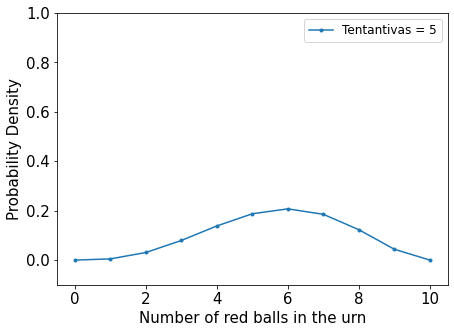

In [5]:
N = np.arange(0,11) # Quantas bolas vermelhas existem na urna
M = 10 - N # Dado que sei quantas bolas vermelhas existem, quantas brancas existem

plt.figure(figsize=[7,5])
T = 5 # bolas TOTAIS retiradas (qualquer cor)
R = 3 # Bolas VERMELHAS retiradas
prob = (((N/(N + M))**R) * (M/(N + M))**(T - R)) # probabilidade 
plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

*Aumentando os valores de 10 ou 100 vezes, o que ocorre?*

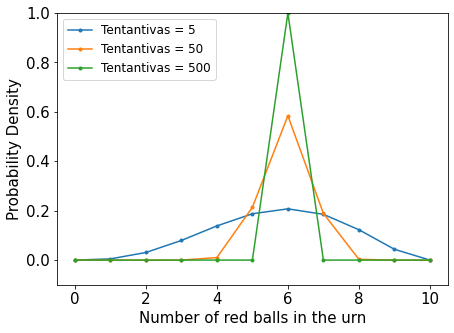

In [6]:
N = np.arange(0,11)
M = 10 - N

plt.figure(figsize=[7,5])
for factor in [1,10,100]:
    T = 5*factor
    R = 3*factor
    prob = (((N/(N + M))**R) * (M/(N + M))**(T - R))
    plt.plot(N, prob/(prob.sum()), '.-', label='Tentantivas = {}'.format(T))
plt.legend(fontsize = 12)
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Number of red balls in the urn', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

 - Quantas tentativas precisamos para ter 100% de certeza?

1075.0


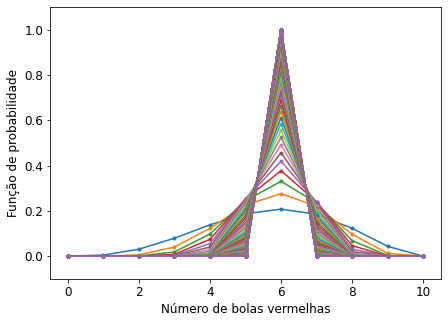

In [7]:
N = np.arange(0,11,1)
M = 10. - N

#print(N)
plt.figure(figsize=[7,5])

for factor in np.arange(1,1000):
    T = 5.*factor
    R = 3.*factor

    prob = ((N/(N+M))**R) * ((M/(N+M))**(T-R))
    prob_norm = prob/prob.sum()

    plt.plot(N, prob_norm, '.-', label='Tentativas = {:02.0f}/{:3.0f}'.format(R,T))
    if len(np.where(prob_norm == 1.0)[0] != 0):
        print(T)
        break
plt.ylim(-0.1, 1.1)
plt.xlabel('N√∫mero de bolas vermelhas', fontsize=12)
plt.ylabel('Fun√ß√£o de probabilidade', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#pl.legend(fontsize=12)
plt.show()

### Exemplo 2

Antes de 1987, quatro supernovas foram observadas a olho nu em 10 s√©culos. 

Qual seria a probabilidade de uma supernova ser observada a olho nu no s√©culo XX?

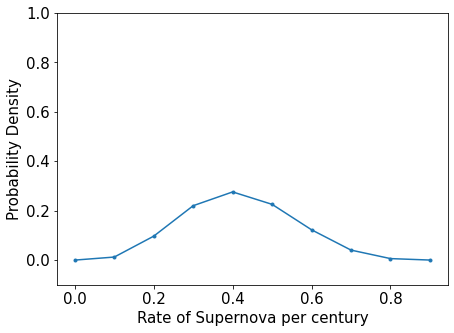

In [8]:
rate = np.arange(0, 1, 0.1)
obs = 4
time_span = 10

prob = (rate**obs) * ((1 - rate)**(time_span - obs))

plt.figure(figsize=[7,5])
plt.plot(rate, prob/(prob.sum()), '.-')
plt.ylim(-0.1, 1.0)
plt.ylabel('Probability Density', fontsize=15)
plt.xlabel('Rate of Supernova per century', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 4)
## Distribui√ß√µes e Teorema do Limite Central

Quando trabalhamos com probabilidades em larga escala, invariavelmente passamos a trabalhar com *distribui√ß√µes* (haver√° um comportamente padr√£o conforme mais repeti√ß√µes v√£o sendo feitas). 

Vejamos os casos mais comuns de distribui√ß√µes de vari√°veis discretas:

    (1) Modelo Bernoulli: modelo adequado para experimentos aleat√≥rios em que o espa√ßo amostral consta de somente dois resultados 'sucesso' e 'fracasso'. 
    
$E(x) = p$;

$Var(x) = p(1-p)$;

$DP = \sqrt{p(1-p}$;

$CV = \frac{1-p}{p}$;

    (2) Modelo binomial: basicamente o modelo bernoulli replicado v√°rias vezes. 

In [9]:
## Plots explorando os modelos. 

In [10]:
## escrever sobre as distribui√ß√µes de Poisson e outros... Depois de passar a matem√°tica deles, deixar os gr√°ficos abaixo. 

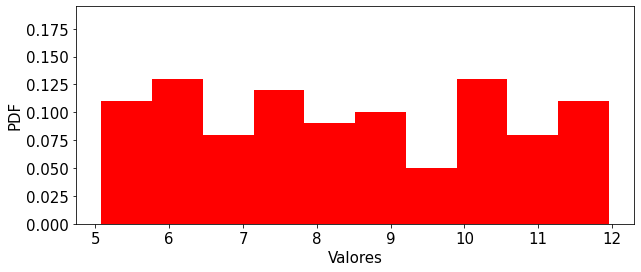

In [11]:
# Criando distribui√ß√£o uniforme aleat√≥ria (valores entre 5 e 12) e plotando a distribui√ß√£o
bins = 10

distribuicao = np.random.uniform(low=5, high=+12, size=100)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

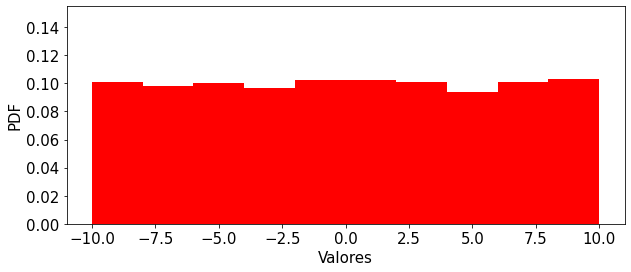

In [12]:
bins = 10

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

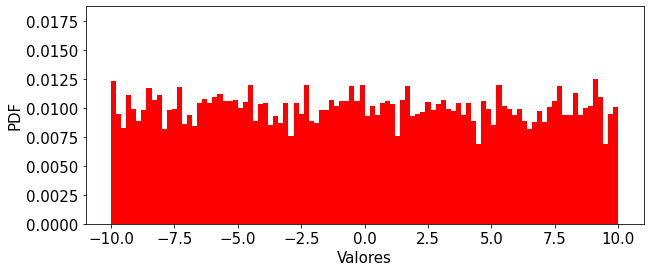

In [13]:
bins = 100

distribuicao = np.random.uniform(low=-10, high=+10, size=10000)

value, binedge = np.histogram(distribuicao, bins=bins)

plt.figure(figsize=[10,4])
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=1.0*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylim(0, 1.5*np.max(value/np.sum(value)))
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valores',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

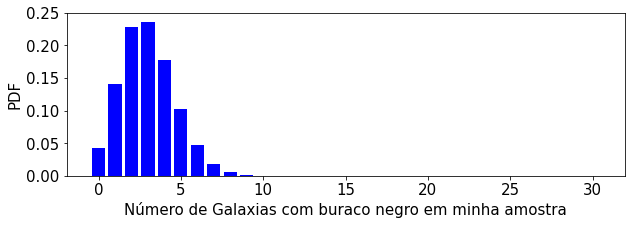

In [14]:
## Distribui√ß√£o Binomial
import scipy.special as sp

p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # n√∫mero de "tentativas", n√∫mero de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)

pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(i, pdf/pdf.sum(), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('N√∫mero de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - E se fizermos uma distribui√ß√£o rand√¥mica?

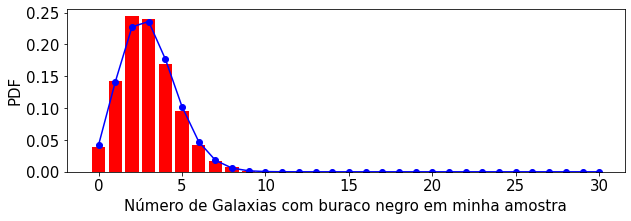

In [15]:
p = 0.1   # probabilidade de sucesso, valores da minha amostra 1.
q = 1 - p # probabilidade de falha.

N = 30    # n√∫mero de "tentativas", n√∫mero de objetos estudados na minha amostra 2.

i = np.arange(0, N+1, 1)
pdf = (p**i) * (q**(N - i)) * sp.factorial(N) / (sp.factorial(i)*sp.factorial(N - i))

distribuicao = np.random.binomial(n=30, p=0.1, size=1000)
value, binedge = np.histogram(distribuicao, bins=i)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(i, pdf/pdf.sum(), 'bo-')
plt.bar(binedge[:-1], value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('N√∫mero de Galaxias com buraco negro em minha amostra',fontsize=15)
plt.yticks(np.arange(0, 0.3, 0.05),fontsize=15)
plt.xticks(fontsize=15)
plt.show()

√â poss√≠vel simularmos numeros aleat√≥rios que sigam uma densidade de probabilidade conhecida. √â uma boa forma de modelarmos os dados que detectamos em nossa pesquisa.

### Distribui√ß√£o de Poisson

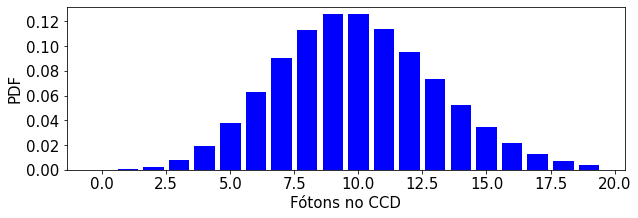

In [16]:
time = 5

mi = 2 * time

n = np.arange(0, mi*2.0, 1.0)

pdf = ((mi**n)/(sp.factorial(n)))*np.exp(-mi)

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.8)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('F√≥tons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Distribui√ß√£o Normal

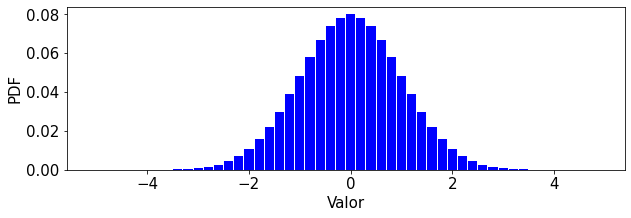

In [17]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Distribui√ß√£o rand√¥mica

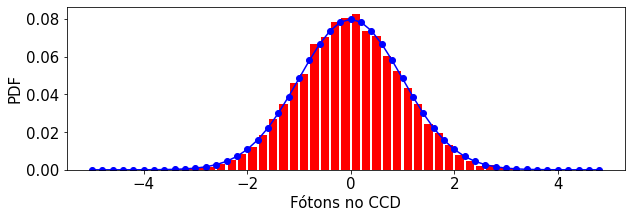

In [18]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

distribuicao = np.random.normal(loc=mu, scale=sigma, size=10000)
value, binedge = np.histogram(distribuicao, bins=n)


plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(n, pdf/np.sum(pdf), 'bo-')
plt.bar((binedge[:-1] + binedge[1:])/2, value/np.sum(value), width=0.8*np.mean(np.diff(binedge, n=1)), color='red')
plt.ylabel('PDF',fontsize=15)
plt.xlabel('F√≥tons no CCD',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

 - Calculando a probabilidade num intervalo

Probabilidade entre (mu - sigma) e (mu + sigma) = 0.681


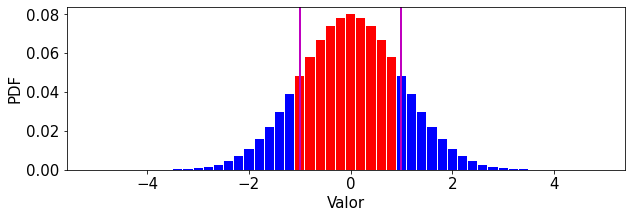

In [19]:
mu = 0.0
sigma = 1.0

n = np.arange(-5, 5, 0.2)

pdf = (1./(sigma*np.sqrt(2*np.pi))) * np.exp(((-1/(2*(sigma**2)))*((n - mu)**2)))

plt.figure(figsize=[10, 3], facecolor='white')
plt.bar(n, pdf/np.sum(pdf), color='blue', width=0.18)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.axvline(mu - sigma, color='m', lw=2)
plt.axvline(mu + sigma, color='m', lw=2)

probabilidade = 0
for i in range(len(n)):
    if (n[i] > mu - sigma) * (n[i] < mu + sigma): #Podemos mudar +-2sigma para termos  95% ou +-3sigma para 99%...
        plt.bar(n[i], pdf[i]/np.sum(pdf), color='red', width=0.18)
        probabilidade += pdf[i]/np.sum(pdf)

print(r'Probabilidade entre (mu - sigma) e (mu + sigma) = {:.3f}'.format(probabilidade))
plt.show()

### Teorema do limite central

√Äs vezes, a estat√≠stica parece m√°gica! 

Somos capazes de tirar conclus√µes generalistas e poderosas a partir de dados relativamente escassos. De algum modo podemos adquirir uma percep√ß√£o significativa de uma elei√ß√£o presidencial meramente falando ao telefone com mil eleitores. Podemos testar cem peitos de frango em busca de salmonela numa f√°brica de processamento de aves e concluir, com base apenas nessa amostra, se a f√°brica √© inteiramente segura. 

*De onde vem esse poder?*

O teorema do limite central ser√° nossa principal fonte de poder para essas an√°lises (as que envolvem o uso de uma amostra para inferir algo acerca de uma popula√ß√£o grande). Esses tipos de infer√™ncia podem parecer m√≠sticos, mas na verdade s√£o apenas uma combina√ß√£o de duas ferramentas: **probabilidade** e **amostragem adequada**.

Suponha que estamos em busca de um onibus comum que desapareceu em meio a seu trajeto de praxe. Durante a sua investiga√ß√£o, voc√™ encontra um onibus engui√ßado em meio a uma estrada deserta. Se voc√™ entende que, ao olhar para os passageiros (a m√©dia de idade, ou a m√©dia de peso) √© poss√≠vel inferir que n√£o se trata do onibus procurado (digamos que se trate de um √¥nibus escolar, teremos uma m√©dia de idade muito menor que o esperado), ent√£o voc√™ entende a ideia b√°sica do terorema.

O princ√≠pio essencial √© que uma amostra grande, adequadamente escolhida, remeter√° √† popula√ß√£o da qual foi retirada. Evidentemente haver√° varia√ß√µes entre uma amostra e outra (por exemplo, cada √¥nibus ter√° uma idade m√©dia um pouco diferente, tendo em vista que ter√° uma mistura de passageiros ligeiramente diferente), mas a probabilidade de que qualquer amostra se desvie enormemente da popula√ß√£o subjacente √© muito baixa.

Essa l√≥gica que nos possibilitou concluir que n√£o se tratava do onibus perdido, j√° que a chance de um onibus comum possuir uma idade m√©dia pr√≥xima dos 13 anos √© muito baixa. Voc√™ p√¥de concluir isso com um grau razo√°vel de confian√ßa. Sim, pod√≠amos estar errados, mas a probabilidade nos diz que a maioria das vezes estaremos certos.

*Mas quantas vezes?*

O teorema central do limite nos possibilita fazer as seguintes infer√™ncias:

    - Se tivermos informa√ß√µes detalhadas sobre alguma popula√ß√£o, ent√£o podemos fazer infer√™ncias poderosas sobre qualquer amostra adequadamente extra√≠da dela. 
    - Se tivermos informa√ß√µes detalhas sobre uma amostra extra√≠da de modo adequado (m√©dia e desvio padr√£o), podemos fazer infer√™ncias surpreendentemente acuradas sobre a popula√ß√£o.
    - Se tivermos dados que descrevem uma amostra particular, e dados sobre uma popula√ß√£o particular, podemos inferir se a amostra √© consistente ou n√£o com uma amostra com probabilidade de ter sido tirada dessa popula√ß√£o. 
    - Por fim, se soubermos as caracter√≠sticas subjacentes de duas amostras, podemos inferir se ambas foram provavelmente tiradas ou n√£o da mesma popula√ß√£o. 

 - Vejamos o que ocorre quando coletamos qualquer tipo de dados:

##### Dados aleat√≥rios numa distribui√ß√£o uniforme

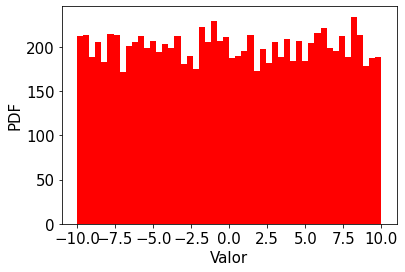

M√©dia da distribui√ß√£o: -3.4207923870875456


In [20]:
distribuicao = np.random.uniform(low=-10, high=+10, size=10000) 
#Distribui√ß√£o aleat√≥ria e uniforme
plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print ('M√©dia da distribui√ß√£o: '+str(distribuicao[np.random.randint(0, 10000, 2)].mean()))

A forma da distribui√ß√£o uniforme vai mudando conforme pegamos a m√©dia alguns pares de seus elementos. A distribui√ß√£obui√ß√£o dessas m√©dias ter√° uma forma interessantemente proxima ao de uma gaussiana.

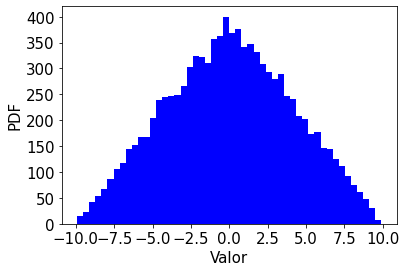

In [21]:
nova_distribuicao = np.array([])

n = 2

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Se ao inv√©s de pegarmos pares, pegarmos centenas de elementos e calcularmos sua m√©dia, aos poucos formaremos uma distribui√ß√£o cada vez mais pr√≥xima de uma gaussiana!

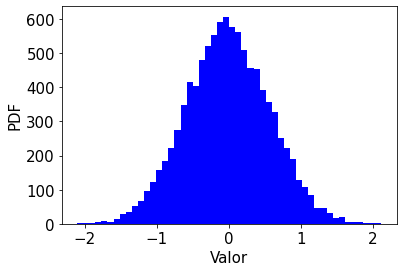

In [22]:
nova_distribuicao = np.array([])

n = 100 #para n muito maior

for i in range(10000):
    indices = np.random.randint(0, 10000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Aumentando a quantidade de dados, a distribui√ß√£o vai ganhando mais forma.
O mesmo ocorre para distribui√ß√µes n√£o lineares. 

##### Dados aleat√≥rios numa distribui√ß√£o exponencial

Perceba que, apesar de se tratar de dados que obedecem uma distribui√ß√£o exponencial, a distribui√ß√£o de suas m√©dias voltam a ter a forma de gaussiana.

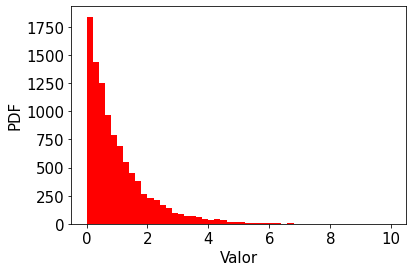

In [23]:
distribuicao = np.random.exponential(scale=+1, size=10000)

plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

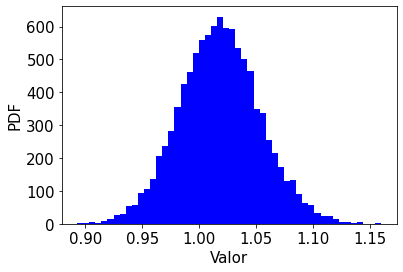

In [24]:
nova_distribuicao = np.array([])

n = 1000 #tente alterar esse numero e verificar o quanto a forma de sino de aproxima para n>>>

for i in range(10000):
    indices = np.random.randint(0, 1000, n)
    nova_distribuicao = np.append(nova_distribuicao, distribuicao[indices].mean())

plt.hist(nova_distribuicao, color='blue', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# 5)
## Correla√ß√µes e M√©todos

Imagine que uma noite de observa√ß√£o, um astr√¥nomo queira analisar os dados obtidos (arquivo_1.dat). Esses dados s√£o referentes ao fluxo de luz de duas estrelas que foram medidas simultaneamente em um mesmo conjunto de 100 frames (digamos Estrela A e Estrela B).

Tendo isso em mente, poder√≠amos nos fazer algumas perguntas:

*Existe correla√ß√£o entre estas duas estrelas?*

*Qual a probabilidade desta correla√ß√£o ser real?*

*Se, por um acaso, houve uma observa√ß√£o na noite anterior dessas duas mesmas estrelas em um conjunto de 87 imagens (arquivo_2.dat), qual a probabilidade destes dois conjuntos de dados tenham como origem a mesma distribui√ß√£o (qual o grau de confian√ßa dessa observa√ß√£o)?*

A correla√ß√£o mede o grau em que dois fen√¥menos est√£o relacionados entre si. Duas vari√°veis tem correla√ß√£o positiva se uma varia√ß√£o numa delas √© associada a uma varia√ß√£o da outra no mesmo sentido, e uma correla√ß√£o ser√° negativa se o oposto ocorre. Vejamos o qu√£o disperso √© o fluxo de ambas as estrelas:

In [25]:
df_1 = pd.read_csv('arquivo_1.dat', header = 1, delim_whitespace=True) #Data Frame da primeira observa√ß√£o
df_1 = pd.DataFrame(data = df_1.values,columns = ['Estrela A', 'Estrela B'])
df_1.describe()

Estrela A   Estrela B
count  100.000000  100.000000
mean   138.989146  201.541003
std     25.414835   26.192340
min     71.011480  132.826179
25%    124.417016  184.757203
50%    139.690902  203.802690
75%    156.359194  219.714019
max    201.424672  262.348418

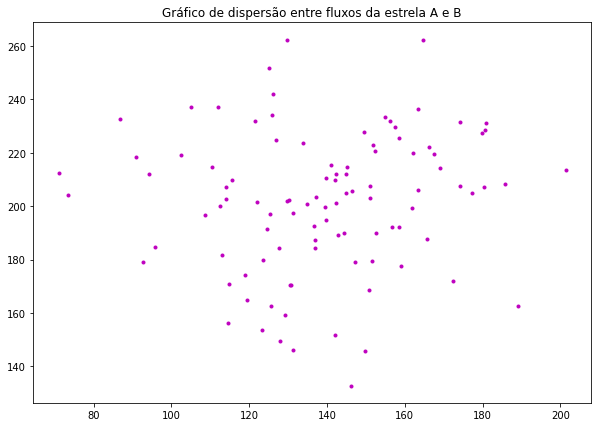

In [26]:
plt.figure(figsize = [10,7])
plt.title('Gr√°fico de dispers√£o entre fluxos da estrela A e B')
plt.plot(df_1['Estrela A'], df_1['Estrela B'],'m.') 
plt.show()

Observamos que trabalhar com um padr√£o constituido de pontos dispersos numa tela √© um tanto inconveniente. Em vez disso, podemos utilizar o poder da correla√ß√£o como ferramenta estat√≠stica para encapsular uma associa√ß√£o entre duas vari√°veis numa √∫nica estat√≠stica descritiva: **O coeficiente de correla√ß√£o**.

Este coeficiente se trata de um n√∫mero √∫nico que varia de -1 a +1. Uma correla√ß√£o de 1 ser√° uma correla√ß√£o perfeita, enquanto -1 ser√° uma correla√ß√£o perfeitamente inversa. Quanto mais proximo de 1 ou -1, mais forte a associa√ß√£o. Para esse caso, usarei *Coeficiente de Kendall*, $œÑ$, que mede o como uma vari√°vel aumenta enquanto outra vari√°vel tamb√©m aumenta, sem exigir que o aumento seja representado por uma rela√ß√£o linear.

> **Pearson**:  Param√©trico! Tende para uma distribui√ß√£o t quando temos duas distribui√ß√µes normais.

> **Spearman**: N√£o param√©trico! Tende para uma distribui√ß√£o t para N grandes. Ao contr√°rio do coeficiente de Pearson, o coeficiente de Spearman n√£o exige a suposi√ß√£o de que a rela√ß√£o entre as vari√°veis seja linear, nem requer que as mesmas sejam quantitativas ‚Äì pode inclusive ser utilizado para verificar rela√ß√£o entre vari√°veis medidas no n√≠vel ordinal.

> **Kendall**: N√£o param√©trico! Tende mais rapidamente para uma distribui√ß√£o t para N intermedi√°rios (prefer√≠vel). Uma vantagem de tau sobre o coeficiente de Spearman √© a possibilidade de ser generalizado para um coeficiente de correla√ß√£o parcial.

> **OBS:** Uma caracter√≠stica atraente do coeficiente de correla√ß√£o √© que ele n√£o est√° ligado a nenhuma unidade. Podemos calcular a correla√ß√£o entre altura e peso - mesmo que a altura seja medida em cent√≠metros e o peso em quilogramas.

In [27]:
x_1 = df_1['Estrela A']
y_1 = df_1['Estrela B']

In [28]:
tau_11, p_value_11 = stats.kendalltau(x_1,y_1)
print('tau = '+str(tau_11)) #Conferir resultado de tau.
print('A probabilidade de haver correlacao: '+str(1 - p_value_11))

tau = 0.098989898989899
A probabilidade de haver correlacao: 0.8555111790224474


>>**OBS**: Aten√ß√£o. O p_value calculado na fun√ß√£o stats utiliza como base o 'null hypothesis is an absence of association'. Ou seja, o calculo √© considerando **H0** = **n√£o h√° correla√ß√£o**. Isso significa que p_value ser√° a probabilidade de **n√£o** haver correla√ß√£o. O tau estar baixo significa que a correla√ß√£o √© fraca, mas isso n√£o quer dizer que a probabilidade tamb√©m seja. Nesse caso, identificamos uma correla√ß√£o, mas ela √© fraca. 

A partir daqui se faz necess√°rio explorar a infer√™ncia estat√≠stica e uma de suas ferramentas mais famosas, o **teste de hip√≥teses.**

 A estat√≠stica por s√≠ s√≥ n√£o prova nada; em vez disso, usamos infer√™ncia para aceitar ou rejeitar explica√ß√µes com base na sua relativa probabilidade. Qualquer infer√™ncia estat√≠stica come√ßa com uma hip√≥tese nula impl√≠cita ou expl√≠cita. Essa √© nossa premissa de partida, que ser√° rejeitada ou n√£o com base na nossa an√°lise subsequente. 
 
 Se rejeitamos a *hip√≥tese nula*, ent√£o geralmente aceitamos alguma hip√≥tese alternativa que seja mais consistente com os dados observados. 
 
 > Por exemplo, no tribunal a hip√≥tese nula H0 √© a de que o r√©u √© inocente.
 
Geralmente queremos provar a *Hip√≥tese alternativa* **H1**, enquanto batemos na *Hip√≥tese nula* **H0**. Note que a hip√≥tese nula e a hip√≥tese alternativa s√£o completamente l√≥gicas e, se uma √© verdadeira, a outra n√£o √©. Se rejeitamos uma afirma√ß√£o, devemos aceitar a outra.

> Nem sempre provamos a H0, podendo significar apenas que H1 est√° equivocada ou que as hip√≥teses n√£o servem para o grupo de dados escolhidos. Em todo caso, √© mais seguro afirmar apenas que, *com base nos dados coletados, meramente falhamos em rejeitar H0*.

Geralmente usamos o valor de 5% como limiar mais comum utilizado nas infer√™ncias estat√≠sticas. Essa probabilidade √© conhecida como *n√≠vel de signific√¢ncia* e representa o limite superior para a probabilidade de observa√ß√£o de algum padr√£o de dados se a hip√≥tese nula fosse verdadeira. Ou seja, podemos rejeitar **H0** no nivel 0.05 se houver uma chance menor do que 5% de obter um resultado no m√≠nimo t√£o extremo quanto o que observamos se a hip√≥tese nula fosse verdadeira. 

Em outras palavras, se a chance de **H0** ser verdadeira, seguindo os dados coletados, for de 5% ou menos, rejeitaremos ela e aceitaremos **H1**.

- Quanto a compara√ß√£o da estrela A e B da mesma observa√ß√£o, diremos que:

**H0** : pertencem a mesma distribui√ß√£o.
**H1** : s√£o objetos totalmente distintos.

Queremos 5% seja a probabilidade dos nossos dados serem referentes ao **H0** caso ela seja verdadeira, importante definir isso previamente para que n√£o haja vi√©s.

Se n√£o chegarmos nesse valor, n√£o poderemos afirmar que **H0** √© mentira (lembre do que discutimos antes). 
Ou seja, se os dados se referem a **H0** em apenas 5% ou menos das vezes, ja assumimos que **H1** estar√° correto. Se as hip√≥teses foram bem constru√≠das (ou √© uma, ou √© outra), nossa decis√£o estar√° correta em 95% das vezes.


O que chamamos de *p_value* √© a probabilidade espec√≠fica de obter um resultado no m√≠nimo t√£o extremo quanto o observado caso **H0** fosse verdadeira.

No nosso caso, a probabilidade das estrelas A e B da primeira observa√ß√£o n√£o fazerem parte da mesma distribui√ß√£o ser√°:

In [29]:
print(str((round(p_value_11*100,2)))+'%')

14.45%


 - Fazendo para os dados coletados na segunda observa√ß√£o (se s√£o, de fato, as mesmas estrelas, teremos uma correla√ß√£o fraca entre elas tamb√©m).

In [30]:
df_2 = pd.read_csv('arquivo_2.dat', header = 1, delim_whitespace=True) #Data Frame da segunda observa√ß√£o
df_2 = pd.DataFrame(data = df_2.values,columns = ['Estrela A', 'Estrela B'])
x_2= df_2['Estrela A']
y_2=df_2['Estrela B']
tau_22, p_value_22 = stats.kendalltau(x_2,y_2)
print('tau = '+str(tau_22))
print('A probabilidade de haver correlacao (H0 rejeitada): '+str(1 - p_value_22))

tau = 0.07297514033680833
A probabilidade de haver correlacao (H0 rejeitada): 0.6830945818907175


In [31]:
df_2.describe()

Estrela A   Estrela B
count   87.000000   87.000000
mean   132.255606  194.484118
std     26.561849   24.340571
min     62.577636  143.982292
25%    117.814211  176.610733
50%    134.793448  196.219248
75%    151.544973  207.845813
max    182.074902  256.714477

Ou seja, percebemos baixa correla√ß√£o entre as estrelas A e B de ambas as observa√ß√µes, mas elas definitivamente possuem correla√ß√£o entre si. Isso vai de encontro com o que sab√≠amos, tendo em vista que s√£o observa√ß√µes dos mesmos objetos. 
Perceba que a menor correla√ß√£o para o caso da segunda observa√ß√£o pode ser explicada pelo fato de haver sido captado algum fen√¥meno atmosf√©rico que tenha afetado mais uma estrela que outra (por exemplo, passagem de nuvens que as ofuscam de forma equivalente), ou algum ru√≠do do instrumento. De qualquer forma, se trata de uma observa√ß√£o diferente, e √© de se esperar que a correla√ß√£o detectada seja diferente tamb√©m.

 - **t-student** e **f-test**:

  A *distribui√ß√£o t de Student* √© uma distribui√ß√£o de probabilidade absolutamente cont√≠nua e sim√©trica, que nos servir√° para comparar a m√©dia dos dados coletados (que segue distribui√ß√£o Normal) numa hip√≥tese inicial (**H0**). Funciona mesmo em casos em que n√£o se sabe qual √© a m√©dia ou o desvio padr√£o da popula√ß√£o, contanto que ela seja normal. 

   Um *teste F* √© qualquer teste estat√≠stico no qual a estat√≠stica de teste tem uma distribui√ß√£o F (uma distribui√ß√£o de probabilidade cont√≠nua) sob a hip√≥tese nula, baseando-se na sua variancia. √â mais frequentemente usado ao comparar modelos estat√≠sticos que foram ajustados a um conjunto de dados, a fim de identificar o modelo que melhor se ajusta √† popula√ß√£o da qual os dados foram amostrados. Por exemplo, este teste √© util para estudar a hip√≥tese de que as m√©dias de um determinado conjunto de popula√ß√µes normalmente distribu√≠das, todas com o mesmo desvio padr√£o, s√£o iguais, por meio da an√°lise de *vari√¢ncia*. 

In [32]:
def tstudent(x,y):
    '''
    recebe dois data frames e retorna o valor do t e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade ter√° - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (ux - uy)/(s*np.sqrt(m**(-1) + n**(-1))),v

def f_test(x,y):
    '''
    recebe dois data frames e retorna o valor do f e o grau de liberdade
    '''
    ux = x.mean()
    uy = y.mean()
    n = len(x)
    m = len(y)
    v = n + m - 2 ##nesse caso estamos comparando apenas dois tipos de dados, entao nosso grau de liberdade ter√° - dois
    s = np.sqrt((n*(x.std()**2) + m*(y.std()**2))/v)
    return (x.std()**2)/(y.std()**2),v

 - Sabendo que os valores da tabela t-student s√£o:
 
 
**(Unicaudal)** Pegando 5% apenas do *lado esquerdo*:

<code>stats.t.ppf(0.05,df=tstudent(x_1,x_2)[1])</code>

**(Unicaudal)** Pegando 5% apenas do *lado direito*:

<code>stats.t.ppf(1 - 0.05, df=tstudent(x_1,x_2)[1])</code>

**(Bicaudal)** Pegando 5% somando-se *ambos os extremos*:

<code>stats.t.ppf((1 - 0.05)/2,df=tstudent(x_1,x_2)[1])</code>

In [33]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(x_1,x_2)[1])
stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1])

1.9728699462074988

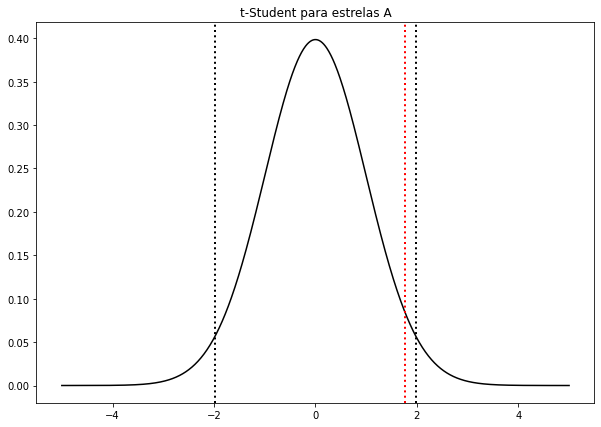

In [34]:
plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** n√£o pode ser rejeitada seguindo nosso nivel de significancia. Isso significa que suas M√âDIAS sao equivalentes e, portanto, devem pertencer a mesma distribui√ß√£o. Em outras palavras, isso significa que o fluxo m√©dio das estrelas A1 e A2 cai numa faixa que esperar√≠amos observar 95 vezes em cem num universo que **H0** seja verdadeira. 
 
 > Se ca√≠sse na faixa vista apenas 5 em cem vezes, considerar√≠amos **H1** correta e descartar√≠amos **H0**, nesse caso, em m√©dia, 95 das vezes em cem estar√≠amos rejeitando **H0** de forma correta.

 - A mesma an√°lise com a observa√ß√£o da Estrela B:

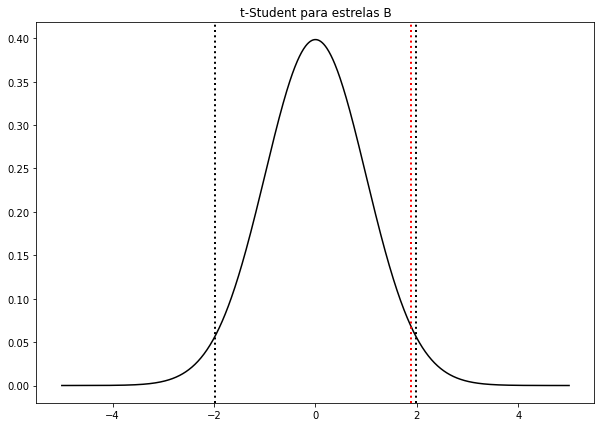

In [35]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=tstudent(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('t-Student para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(tstudent(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=tstudent(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente n√£o pode ser rejeitada. Isso pois suas M√âDIAS sao equivalentes e, portanto, devem pertencer a mesma distribui√ß√£o.

Agora iremos fazer o teste F para levarmos em considera√ß√£o a variancia dos nossos dados.

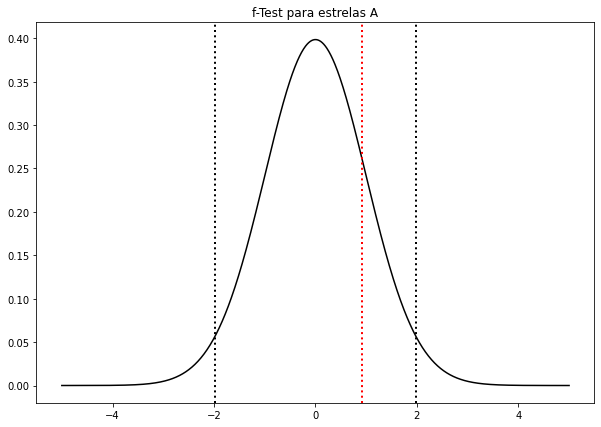

In [36]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(x_1,x_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas A')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(x_1,x_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(x_1,x_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente n√£o pode ser rejeitada. Isso pois suas VARI√ÇNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribui√ß√£o.

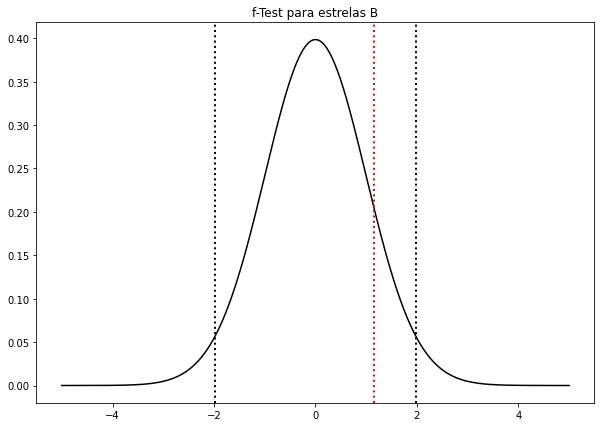

In [37]:
t_dist = np.linspace(-5,+5,1000)
prob = stats.t.pdf(x= t_dist, df=f_test(y_1,y_2)[1])

plt.figure(figsize = [10,7])
plt.title('f-Test para estrelas B')
plt.plot(t_dist,prob,'k')
plt.axvline(f_test(y_1,y_2)[0], color='r', linestyle='dotted', linewidth=2) 
plt.axvline(stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(-stats.t.ppf(1-0.05/2,df=f_test(y_1,y_2)[1]), color='k', linestyle='dotted', linewidth=2) 
plt.show()

 - **H0** novamente n√£o pode ser rejeitada. Isso pois suas VARI√ÇNCIAS sao equivalentes e, portanto, devem pertencer a mesma distribui√ß√£o.

 - E afinal, qual a probabilidade destes dois conjuntos de dados serem equivalentes (tenham como origem a mesma distribui√ß√£o)? 

Sabemos que os dados coletados est√£o dentro do universo **H0**. Ou seja, partindo que **H0** √© verdadeiro (as estrelas observadas fazem parte da mesma distribui√ß√£o), nossos dados concordam com a maioria das outras amostras que viriam da mesma distribuicao. Portanto, podemos afirmar com **95% de certeza** que os dados coletados *vem da mesma distribui√ß√£o*.
> *Perceba que nesse caso as hip√≥teses foram escolhidas tal que 'ou elas pertencem ou n√£o pertencem', e, seguindo as amostras coletadas, h√° 95% de chance dos dados terem vindo de duas estrelas da mesma dsitribui√ß√£o*.

Perceba que nesses c√°lculos (em que usamos a fun√ß√£o stats), **H0** muda de significado. Agora, ela √© dada como sendo as m√©dias equivalentes, pois √© mais conveniente essa escolha de hip√≥tese (ora, se sei que elas possuem alta probabilidade de terem correla√ß√£o, ent√£o exijo mais provas para mudar de ideia e escolho como hip√≥tese nula aquela mais forte). No c√°lculo do coeficiente de correla√ß√£o, **H0** era referente √† ausencia de correla√ß√£o. Em outras palavras, **H0** significou 'estrelas **n√£o pertencem** √† mesma distribui√ß√£o' e passou a significar 'estrelas **pertencem** √† mesma distribui√ß√£o'. Ent√£o, cuidado!

# 6)
## Como modelar dados e estimar par√¢metros.

- Medida de dispers√£o para vari√°veis quantitativas e como funciona o calculo do desvio padr√£o:

Uma medida de dispers√£o para uma vari√°vel quantitativa √© um indicador do grau de
espalhamento dos valores da amostra em torno da medida de centralidade.
H√° diferentes formas de se medir a dispers√£o de uma vari√°vel quantitativa. Aqui ser√£o
vistas a vari√¢ncia e o desvio-padr√£o.

Perceba que se queremos estimar o desvio de uma grandeza $A$ com N elementos (ou microestados), de forma que $A_{total} = \sum_{j=1}^{N} A_j$, e a m√©dia $\bar A = \frac{A_{total}}{N}$, √© intuitivo imaginar que o desvio de apenas um dos elementos seria algo como:

Desvio = $A_j - \bar A$

Para todos os dados, ter√≠amos algo como:

Desvio = $\sum_{j=1}^{N} (A_j - \bar A)$

No entanto, perceba que esse calculo nos resultaria em *zero*:

$D = \sum_{j=1}^{N} A_j - \sum_{j=1}^{N} \bar A = N\bar A - N\bar A = 0$

Portanto, essa forma de quantificar desvio n√£o √© muito inteligente. Digamos, ent√£o, que elevamos essas diferen√ßas ao quadrado, de forma que todos os valores fiquem positivos.

$D = \sum_{j=1}^{N} (A_j - \bar A)^2$

Mas, dessa forma n√£o teremos um desvio *de fato*, e sim um *desvio quadr√°tico total* (al√©m de estar elevado ao quadrado, ela depende da quantidade de elementos levantados, ent√£o mesmo um conjunto de dados com **altos desvios** teria desvio total menor do que uma lista **maior** de dados com **pequenos desvios**).

>Talvez, diante da tarefa de propor uma medida de dispers√£o, uma id√©ia natural fosse ent√£o calcular a m√©dia aritm√©tica dos m√≥dulos dos desvios, ou seja, $\frac{\sum_{i = 1}^{n} |x_{i} - \bar x|}{n}$ . Entretanto, ela n√£o √© muito usada na pr√°tica, uma vez que n√£o √© t√£o f√°cil se estabelecerem as propriedades matem√°ticas de uma medida definida com o uso da fun√ß√£o valor absoluto.

Portanto, faz sentido tirarmos a *m√©dia* deste desvio:

$D = \frac{\sum_{j=1}^{N} (A_j - \bar A)^2}{N}$

Tal desvio √© o que chamamos de *vari√¢ncia* anteriormente. Na regress√£o iremos querer minimizar este valor. 
Perceba que em alguns livros teremos a vari√¢ncia abaixo:

$var(x) = \frac{\sum_{i = 1}^{n} (x_{i} - \tilde{x})^{2}}{n-1}$

Quando estamos tratando de dados, √© preciso diferenciar o que seriam os par√¢metros da nossa popula√ß√£o e quais os par√¢metros medidos da nossa amostra. Uma popula√ß√£o ter√° m√©dia e vari√¢ncia tais que a m√©dia √© $\bar A = \frac{A_{total}}{N}$ e vari√¢ncia $V = \frac{\sum_{j=1}^{N} (A_j - \bar A)^2}{N}$. No entanto, quando se trata das amostras, √© necess√°rio levar em conta que algumas podem estar enviesadas de forma que suas m√©dias se afastem muito da m√©dia da popula√ß√£o. Devido a esse comportamento, √© prefer√≠vel, em larga escala, calcular o desvio dividindo por um numero ligeiramente menor do que o tamanho da amostra, no caso a vari√¢ncia fica dividindo por $(n-1)$ (sendo **N** a quantidade de elementos da popula√ß√£o e **n** a quantidade de elementos da amostra). Isso pois a vari√¢ncia, no fim, acaba ficando maior e, portanto, mais segura.

> **OBS**: Mais detalhes da matem√°tica por tr√°s dessa distin√ß√£o podem ser vistos no *exemplo 11.4* na p√°gina 299 do livro *Estat√≠stica b√°sica - Bussab e Morettin*

Lembrando que a unidade da vari√¢ncia √© o quadrado da unidade dos dados. Por exemplo, se os dados forem medidos em metros, a unidade da vari√¢ncia ser√° metro ao quadrado. Logo, para que se tenha o desvio *de fato* dos nossos dados, ser√° necess√°rio tirar sua ra√≠z. √â o que chamamos de **desvio padr√£o**.

- Regress√£o

A an√°lise de regress√£o parecer√° um elixir milagroso para n√≥s que trabalhamos com estat√≠stica. Vejamos o caso a seguir:

Ser√° que o estresse no emprego pode de fato nos ser prejudicial? Sim, h√° evid√™ncias fortes de que isso seja verdade.  No entanto, CEOs, que rotineiramente precisam tomar decis√µes de suma import√¢ncia para a empresa, correm risco significativamente menor que suas secret√°rias. O tipo de estresse mais perigoso estaria, na verdade, associado a ter 'baixo controle' sobre as pr√≥prias responsabilidades. Diversos estudos envolvendo milhares de funcion√°rios p√∫blicos brit√¢nicos descobriram que trabalhadores que t√™m pouco controle sobre suas atribui√ß√µes t√™m uma taxa de mortalidade significativamente mais alta que outros trabalhadores com maior autoridade na tomada de decis√µes. Segundo essa pesquisa, o estresse prejudicial √† sa√∫de √© aquele associado a lhe dizerem o que fazer enquanto voc√™ tem pouco a dizer sobre como e quando fazer. Como esses pesquisadores (estudo de Whitehall) puderam chegar a tal conclus√£o?

Nitidamente n√£o se trata de um experimento aleat√≥rio. N√£o se pode designar seres humanos arbitrariamente a diferentes empregos e for√ß√°-los a trabalhar neles por v√°rios anos para ent√£o mensurar qual a maior taxa de mortalidade. 

Em vez disso, os pesquisadores brit√¢nicos coletaram detalhados dados longitudinais de milhares de indiv√≠duos nesse servi√ßo; esses dados podem ser analisados para identificar associa√ß√µes significativas, tais como uma liga√ß√£o entre empregos de 'baixo controle' e doen√ßa card√≠aca coron√°ria. No entanto, uma associa√ß√£o simples n√£o √© suficiente para concluir que certos tipos de emprego s√£o ruins para a sa√∫de. Se meramente observamos que trabalhadores de baixo escal√£o na hierarquia do servi√ßo civil brit√¢nico tem maior taxa de doen√ßas card√≠acas, nossos resultados seriam confundidos por outros fatores. Por exemplo, a distribui√ß√£o de empregos de baixo escal√£o pode estar enviesada para uma popula√ß√£o com menos acesso a educa√ß√£o e mais h√°bitos n√£o saud√°veis (como de fumar, por exemplo, talvez devido ao estresse do trabalho ou devido a uma inf√¢ncia mais dificil), ou seu sal√°rio mais baixo pode reduzir seu acesso a servi√ßos de sa√∫de. O ponto √© que qualquer estudo que simplesmente compare resultados em termos de sa√∫de num grupo grande de trabalhadores brit√¢nicos n√£o nos dir√° realmente muita coisa. Outras fontes de varia√ß√£o nos dados t√™m probabilidade de obscurecer a rela√ß√£o na qual estamos interessaos. Ser√° que 'baixo controle no emprego' est√° realmente provocando doen√ßas card√≠acas?

A **an√°lise de regress√£o** √© a ferramenta estat√≠stica que nos ajuda a lidar com esse desafio. Especificamente, a an√°lise de regress√£o nos permite quantificar a rela√ß√£o entre uma vari√°vel espec√≠fica e um resultado que nos interessa enquanto *controlamos outros fatores*. Ou seja, podemos isolar o efeito de uma vari√°vel, como ter certo tipo de emprego, enquanto mantemos os efeitos das outras vari√°veis constantes. Os estudos WhiteHall usaram an√°lise de regress√£o para medir os impactos sobre a sa√∫de que o baixo controle no emprego tem entre pessoas que s√£o similares em outros aspectos, como fumar. 

A maioria dos estudos os quais voc√™ l√™ nos jornais √© baseada em an√°lise de regress√£o. E agora veremos como ela funciona e quais os m√©todos mais utilizados. Quando *feita adequadamente*, a an√°lise de regress√£o pode nos *ajudar a estimar* algum efeito que afete nossos dados separadamente de outros efeitos. 
> *Aten√ß√£o √†s palavras destacadas*.

Em ess√™ncia, a an√°lise de regress√£o busca encontrar o 'melhor encaixe' para uma rela√ß√£o linear entre duas vari√°veis. Por exemplo, se pudermos plotar a rela√ß√£o altura e peso de uma amostra da popula√ß√£o brasileira, veriamos que pessoas mais altas tenderiam a pesar mais - embora, obviamente, n√£o seja sempre o caso. O padr√£o descrito *aproximadamente* no plot seria o de uma linha reta. 

In [38]:
dados = pd.read_csv('amostra.dat', delim_whitespace=True
                   )
df_1 = pd.DataFrame(data = dados.values, columns = ['Altura', 'Peso']
                   )

y = df_1['Peso']
x = df_1['Altura']

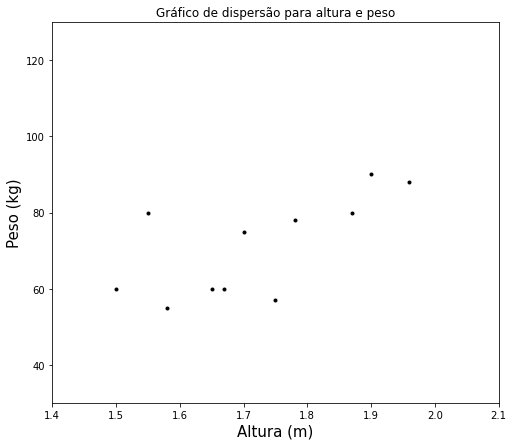

In [39]:
plt.figure(figsize = [8,7])
plt.title('Gr√°fico de dispers√£o para altura e peso')
plt.plot(x, y,'k.') 
plt.ylabel('Peso (kg)', fontsize=15)
plt.xlabel('Altura (m)',  fontsize=15)
plt.ylim(30,130)
plt.xlim(1.4,2.1)
plt.show()

Muitas retas s√£o poss√≠veis e amplamente consistentes com os dados. Mas como sabermos qual a melhor reta para esses dados? 
A an√°lise de regress√£o usa tipicamente uma metodologia chamada **m√≠nimos quadrados ordin√°rios** (MQO). Esse m√©todo encaixa a reta que minimiza a soma dos residuais elevados ao quadrado. Cada observa√ß√£o nos nossos dados de altura e peso tem um residual, que √© a dist√¢ncia vertical a partir da reta de regress√£o, exceto para aquelas observa√ß√µes que se situam diretamente em cima da reta, para as quais o residual vale zero. Quanto maior a soma geral dos residuais, pior √© o encaixe da reta. 

In [40]:
def reta(x,a,b):
    return b + a*x
parameters, covariance = curve_fit(reta, x, y)
error = np.sqrt(np.diagonal(covariance))

In [41]:
y_modelo = reta(x,parameters[0] + error[0],parameters[1]- error[1])

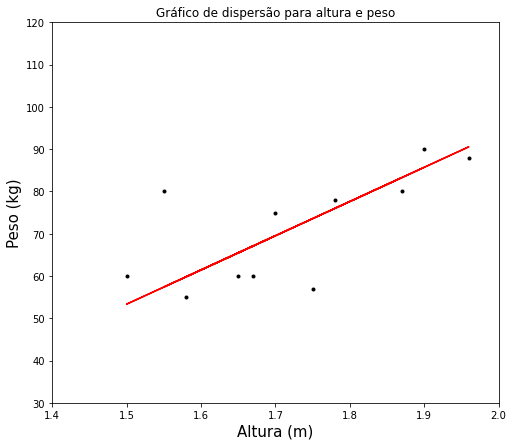

In [42]:
plt.figure(figsize = [8,7])
plt.title('Gr√°fico de dispers√£o para altura e peso')
plt.plot(x, y,'k.')
plt.plot(x,y_modelo,'r-')
plt.ylabel('Peso (kg)', fontsize=15)
plt.xlabel('Altura (m)',  fontsize=15)
plt.ylim(30,120)
plt.xlim(1.4,2.0)
plt.show()

Essa reta √© conhecida como equa√ß√£o de regress√£o e assume a seguinte forma: y = ax + b, onde y √© o peso em quilos e **b** √© a intersec√ß√£o da reta no eixo y (x = 0) e **a** √© a inclina√ß√£o da reta (descreve a melhor rela√ß√£o linear entre altura e peso nessa amostra). 

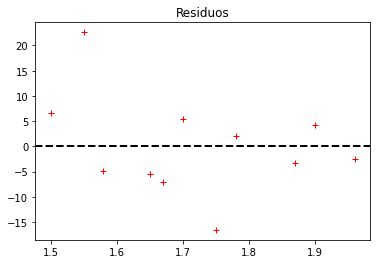

In [43]:
plt.title('Residuos')
plt.plot(x, y - y_modelo , 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

>Perceba que o plot dos res√≠duos n√£o parece fazer muito sentido. No entanto, ela ganha formas mais espec√≠ficas quando nosso ajuste √© piorado. Vejamos o exemplo de uma fun√ß√£o seno abaixo.

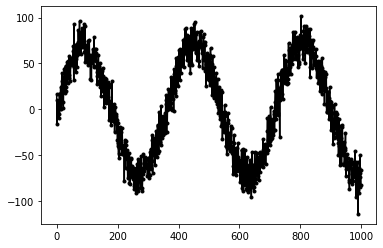

In [44]:
x, y = np.loadtxt('exemplo1_seno.dat', unpack=True)
plt.plot(x, y, 'k.-')
plt.show()

In [45]:
def function(param, x):
    '''
    Funcao que define um seno
    '''
    a = param[0]
    y = a * np.sin(np.deg2rad(x))
    return y

def residuo_quadrado(data, modelo):
    return np.sum((data - modelo)**2)

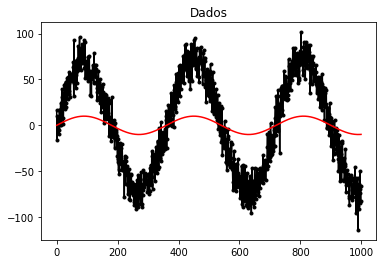

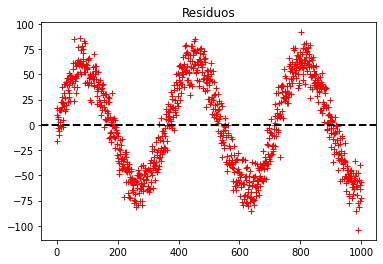

Soma dos quadrados dos residuos: 2059208.0348098518


In [46]:
y_modelo = function(param=[10], x=x)

plt.title('Dados')
plt.plot(x, y, 'k.-')
plt.plot(x, y_modelo, 'r-')
plt.show()

plt.title('Residuos')
plt.plot(x, y - y_modelo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

print('Soma dos quadrados dos residuos:', residuo_quadrado(data=y, modelo=y_modelo))

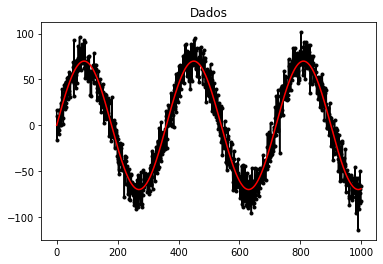

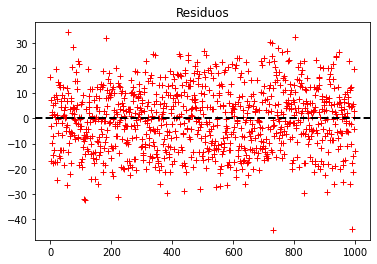

Soma dos quadrados dos residuos: 156053.21288761473


In [47]:
y_modelo = function(param=[70], x=x)

plt.title('Dados')
plt.plot(x, y, 'k.-')
plt.plot(x, y_modelo, 'r-')
plt.show()

plt.title('Residuos')
plt.plot(x, y - y_modelo, 'r+')
plt.axhline(0, color='k', ls='--', lw=2)
plt.show()

print('Soma dos quadrados dos residuos:', residuo_quadrado(data=y, modelo=y_modelo))


Vimos anteriormente como verificamos o coeficiente de correla√ß√£o a fim de verificar se existe uma forte rela√ß√£o linear entre duas vari√°veis ou n√£o. Supondo que a resposta tenha sido positiva, podemos partir dai para come√ßar o calculo da equa√ß√£o da reta que representa essa rela√ß√£o.  

Costuma-se considerar aqui que $y$ √© a vari√°vel a explicar (ou vari√°vel dependente) cujo comportamento se deseja explicar. Por outro lado, $x$ √© a vari√°vel explicativa (ou vari√°vel independente) a ser usada para explicar o comportamento da vari√°vel $y$.

A equa√ß√£o da reta, portanto, pode ser usada para se estimar qual seria o valor $Y_0$ da vari√°vel resposta $y$ correspondente a um determinado valor $x_0$ da vari√°vel preditora $x$. Esse procedimento costuma ser utilizado principalmente nos casos em que a medi√ß√£o da vari√°vel resposta $y$ √© mais cara, dif√≠cil ou demorada, enquanto a medi√ß√£o da vari√°vel explicativa $x$ √© mais barata, f√°cil ou r√°pida.

 - Estimadores de m√≠nimos quadrados

Um dos procedimentos mais usados para obter estimadores √© aquele que se baseia no princ√≠pio dos m√≠nimos quadrados, introduzido por Gauss em 1794, mas que primeiro apareceu com esse nome no ap√™ndice do tratado de Legendre, Nouvelles M√©thodes pour la Determination des Orbites des Com√®tes, publicado em Paris em 1806. Gauss somente viria a publicar seus resultados em 1809, em Hamburgo. Ambos utilizaram o princ√≠pio em conex√£o com problemas de Astronomia e F√≠sica.

    Exemplo 11.9 Bussab e Morettin:
    
Um engenheiro est√° estudando a resist√™ncia Y de uma fibra em fun√ß√£o de seu di√¢metro X e notou que as vari√°veis s√£o aproximadamente proporcionais, isto √©, elas obedecem √† rela√ß√£o $Y \approx \theta X$.

Onde $\theta$ √© o coeficiente de proporcionalidade. 

Agora ele deseja estimar o par√¢metro Œ∏, baseado numa amostra de cinco unidades, que, submetidas a mensura√ß√£o e testes, produziram os resultados:

In [48]:
dados = pd.read_csv('exemplo11-9.dat', delim_whitespace=True
                   )
df_1 = pd.DataFrame(data = dados.values, columns = ['X', 'Y']
                   )

y = df_1['Y']
x = df_1['X']

In [49]:
df_1

X    Y
0  1.2  3.9
1  1.5  4.7
2  1.7  5.6
3  2.0  5.8
4  2.6  7.0

In [50]:
df_1.describe()

X         Y
count  5.000000  5.000000
mean   1.800000  5.400000
std    0.533854  1.172604
min    1.200000  3.900000
25%    1.500000  4.700000
50%    1.700000  5.600000
75%    2.000000  5.800000
max    2.600000  7.000000

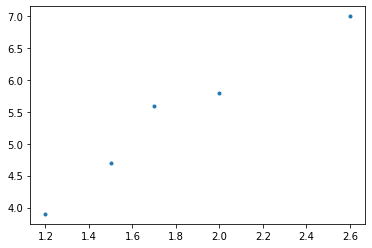

In [51]:
plt.plot(x,y,'.')
plt.show()

Inspecionando os resultados, conclui-se que Œ∏ = 3 parece ser um valor razo√°vel. 
Mas, **como verificar a qualidade dessa estimativa?**

Podemos utilizar o modelo $Y = 3X$ e ver como esse prev√™ os valores de $Y$, para os dados valores de $X$, e como s√£o as discrep√¢ncias entre os valores observados e os estimados pelo modelo.

Criaremos uma coluna (Y ‚Äì 3X) que conter√° as medidas da inadequa√ß√£o do modelo para cada observa√ß√£o da amostra, enquanto o valor $\sum_{i=1}^{5} (Y_i - 3X_i)^{2}$ √© uma tentativa de medir ‚Äú**o erro quadr√°tico total da amostra**‚Äù. 

Como em situa√ß√µes anteriores, elevou-se ao quadrado para evitar o problema do sinal. Quanto menor for o erro quadr√°tico total, melhor ser√° a estimativa. Isso nos sugere procurar a estimativa que torne m√≠nima essa soma de quadrados.

In [52]:
df_1["Y - 3X"] = df_1['Y'] - 3*df_1['X']
df_1["(Y - 3X)^2"] = (df_1['Y'] - 3*df_1['X'])**2
df_1

X    Y  Y - 3X  (Y - 3X)^2
0  1.2  3.9     0.3        0.09
1  1.5  4.7     0.2        0.04
2  1.7  5.6     0.5        0.25
3  2.0  5.8    -0.2        0.04
4  2.6  7.0    -0.8        0.64

 - Matematicamente, o problema passa a ser o de encontrar o valor de Œ∏ que minimize a fun√ß√£o
    
    $S(\theta) = \sum_{i=1}^{5} (Y_i - \theta X_i)^2 $

O m√≠nimo da fun√ß√£o √© obtido derivando-a em rela√ß√£o a Œ∏, e igualando o resultado a zero. 

$\frac{dS}{d\theta} = 0 = \sum_{i=1}^{5} (Y_i - \theta X_i)(-2X_i)$
.:
$\theta_{MQ} = \frac{\sum_{i=1}^{5} X_i Y_ i}{\sum_{i=1}^{5} X_i^2}$

In [53]:
theta = np.sum(df_1["X"]*df_1['Y'])/np.sum(df_1['X']**2)
theta

2.9440599769319493

 - Portanto, o valor m√≠nimo de S ser√°:

In [54]:
S = np.sum((df_1['Y'] - theta*df_1['X'])**2)
S

1.005738177623991

- Observe que, quando usamos $\theta = 3$:

In [55]:
np.sum(df_1['(Y - 3X)^2'])

1.0600000000000014

Como foi dito, n√£o esper√°vamos uma rela√ß√£o perfeita entre as duas vari√°veis, j√° que o di√¢metro da fibra n√£o √© o √∫nico respons√°vel pela resist√™ncia; outros fatores n√£o controlados afetam o resultado. Desse modo, duas amostras obtidas do mesmo di√¢metro $X$ n√£o teriam obrigatoriamente que apresentar o mesmo resultado $Y$, mas valores em torno de um valor esperado $\theta X$.
Em outras palavras, estamos supondo que, para um dado valor da vari√°vel explicativa $X$, os valores da vari√°vel resposta $Y$ seguem uma distribui√ß√£o de probabilidade centrada em Œ∏$X$.

In [56]:
parameters, covariance = curve_fit(reta, x, y)
error = np.sqrt(np.diagonal(covariance))
y_modelo = reta(x,parameters[0] + error[0],parameters[1]- error[1])

Melhor ajuste sendo a reta y = 2.14x + 1.5.


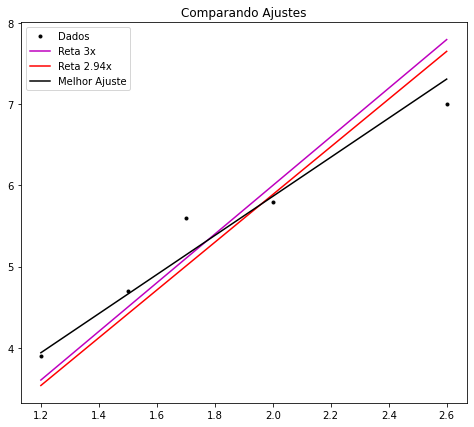

In [57]:
plt.figure(figsize = [8,7])
plt.title('Comparando Ajustes')
plt.plot(x,y,'k.')
plt.plot(x,reta(x,3,0),'m-')
plt.plot(x,reta(x,theta,0),'r-')
plt.plot(x,y_modelo,'k-')
plt.legend(['Dados', 'Reta 3x','Reta 2.94x','Melhor Ajuste'])
print('Melhor ajuste sendo a reta y = 2.14x + 1.5.')
plt.show()

√â comum supor que Œµ tem a mesma distribui√ß√£o, para todo valor x da vari√°vel explicativa X. Desse modo, √© comum escrever: 
$Y = \theta X + \epsilon$.

Sendo:

$\epsilon_i = Y_i ‚Äì \theta X_i$;

Ou seja, √© justamente o desvio vertical (eixo y) de cada ponto! Lembre-se de nossa tentativa de definir **desvio** no inicio deste cap√≠tulo. 

Temos tamb√©m que:

$\sum_{i=1}^{5} \epsilon_{i}^{2} = \sum_{i=1}^{5} (Y_i - \theta X_i)^2 = S(\theta)$.

Ou seja, quando minimizamos $S(\theta)$, estamos *de fato* minimizando os desvios totais relativos ao ajuste vs dados. A partir da√≠ nosso ajuste fica completo. 
> Mais detalhes de como se calcula este erro $\epsilon$ pode ser visto na pagina 307 do livro "Estat√≠stica B√°sica - Bussab e Morettin".

 - M√©todo Chi-quadrado
 
M√©todo n√£o param√©trico que faz compara√ß√£o entre frequencias. Parte-se de amostras aleat√≥rias e independentes.

Considere os dados observacionais j√° categorizados e um modelo e hip√≥tese que prev√™ a popula√ß√£o de cada categoria. A estat√≠stica *qui-quadrado* descreve a qualidade do ajuste dos dados ao modelo. Se os n√∫meros *observados* em cada um dos $ùëò$ elementos forem $O_i$ e os **valores esperados do modelo** forem $E_i$, ent√£o esta estat√≠stica √©:

$X^{2} = \sum_{i=1}^{k} \frac{(O_i - E_i)^{2}}{E_i}$

Bem parecido com o m√©todo dos *m√≠nimos quadrados* 
>D√™ uma olhada e compare-os! 

O m√©todo qui-quadrado m√≠nimo de ajuste do modelo consiste em minimizar a estat√≠stica qui-quadrado variando os par√¢metros do modelo. **A premissa na qual esta t√©cnica se baseia √© que o modelo √© considerado qualitativamente correto e √© ajustado para minimizar (via ùëã2) as diferen√ßas entre ùê∏ùëñ e ùëÇùëñ** que s√£o consideradas devidas apenas a flutua√ß√µes estat√≠sticas.

Na pr√°tica, a busca de par√¢metros √© bastante f√°cil desde que o n√∫mero de par√¢metros seja menor que quatro; se houver quatro ou mais, procedimentos de busca sofisticados podem ser necess√°rios.

Um exemplo bem simples para verificar a premissa do teste qui-quadrado √© o do levantamento de vota√ß√£o para dada decis√£o feita em sala. Digamos que numa sala de 100 pessoas, 38 escolham a decis√£o A, 25 a decis√£o B e assim por diante, como mostra abaixo:

In [16]:
levantamento = np.array([[38,25,16,12,9]])
df = pd.DataFrame(data = levantamento, index = ['Frequencia'], columns = ['A','B','C','D','E'])
df

A   B   C   D  E
Frequencia  38  25  16  12  9

Nesse caso a **frequencia esperada** ser√° aquela que diga qual o valor do voto de cada decis√£o sem que tenhamos feito o levantamento. N√£o h√° nada que nos fa√ßa pensar outra coisa que n√£o o simples 100/5 = 20 para cada decis√£o. Ent√£o chamamos a frequencia esperada $f_{e} = 20$ para todas as colunas. 

A partir desse valor, calculamos tamb√©m a flutua√ß√£o em volta deste valor. Por isso, n√£o √© dificil imaginar que possamos adicionar algumas linhas ao nosso levantamento, tal que:

In [19]:
levantamento = np.array([38,25,16,12,9]) 
#Invertendo a tabela por conveniencia
df = pd.DataFrame(data = levantamento, 
                  index = ['A','B','C','D','E'], 
                  columns = ['Frequencia']
                 )
df['Frequencia Esperada'] = np.array([20,20,20,20,20])
df

Frequencia  Frequencia Esperada
A          38                   20
B          25                   20
C          16                   20
D          12                   20
E           9                   20

In [20]:
df['(f - fe)^2/fe'] = (df['Frequencia'] - df['Frequencia Esperada'])**2/df['Frequencia Esperada']
df

Frequencia  Frequencia Esperada  (f - fe)^2/fe
A          38                   20          16.20
B          25                   20           1.25
C          16                   20           0.80
D          12                   20           3.20
E           9                   20           6.05

> Perceba que quando dividimos pela frequencia esperada, voltamos √† unidade de medida original (que haviamos perdido ao elevar ao quadrado).

A partir dos valores de chi-quadrado para cada decis√£o, podemos analisar esses dados de forma mais acertiva. No entanto, ainda nos falta um valor de base. Esse novo calculo se refere aos *graus de liberdade*:

$gl = k - 1$

Nesse caso, nosso grau de liberdade √© 5-1 = 4. √â basicamente o numero de categorias na distribui√ß√£o de frequencia observada - 1.

A partir daqui podemos recuperar o valor do chi quadrado esperado (ja tabelado) para o grau de liberdade 4 (no caso, $X^{2} = 9,488 $), considerando significancia de 0,05 (tendo 95% de precis√£o).

O que isso significa √© que, com 95% de certeza, valores chi-quadrado total de uma analise com 4 graus de liberdade menores que 9,488 indicam valores proximos (aproximadamente iguais), enquanto chi-quadrado maior de 9,488 significam valores consideravelmente diferentes, e, portanto, singificativos para uma an√°lise. 

No nosso caso, o chi quadrado medido √©:

In [22]:
np.sum(df['(f - fe)^2/fe'])

27.5

Portanto, os valores tabelados s√£o significativamente diferentes entre si, e podemos afirmar que essas diferen√ßas n√£o s√£o levadas apenas ao acaso, mas a preferencia pela decis√£o A √© de fato real (em 95% das vezes que esse levantamento estiver sendo feito dessa maneira, nossa decis√£o estar√° correta).

Em alguns livros ser√° comum encontrar que essa an√°lise √© uma **'an√°lise do teste de qui-quadrado com 1 crit√©rio'**, pois nos propusemos a responder apenas uma pergunta e n√£o precisamos separar os sujeitos em qualquer tipos de grupos.

Podemos separar o sujeito em mais grupos, por exemplo, se fossemos fazer um levantamento entre jovens e idosos sobre dois tipos diferentes de produtos. Poder√≠amos ir atr√°s da pergunta "qual produto vende mais para jovens?", e posteriormente ao levantamento perguntar "a diferen√ßa observada √© de fato relevante?". A ideia do calculo √© basicamente a mesma coisa, mas tendo o cuidado de calcular a m√©dia (valor esperado) de cada produto de forma separada. 

Portanto, se considerarmos um conjunto de dados vindo, por exemplo, de uma observa√ß√£o astron√¥mica, e construirmos um modelo e uma hip√≥tese que explique tais dados, o chi-quadrado nos dir√° o qu√£o bom o modelo est√°. Se trata de uma forma de quantificar a qualidade de nossa an√°lise.

- M√©todo Monte Carlo

O m√©todo Monte Carlo √© uma t√©cnica de simula√ß√£o que utiliza a aleatoriedade para modelar fen√¥menos complexos e resolver problemas em diversas √°reas, como f√≠sica, engenharia, finan√ßas, entre outras. Foi desenvolvido durante o projeto Manhattan, com o objetivo de auxiliar nos c√°lculos de integrais em hiperplanos. Ao inv√©s de calcular a √°rea por baixo de um curva, agora ser√° poss√≠vel sortear N numeros aleat√≥rios num dado espa√ßo, e fazer a rela√ß√£o $N_{BaixoCurva}$/$N_{total}$.

O m√©todo recebe esse nome em homenagem ao famoso cassino de Monte Carlo, em M√¥naco, onde a probabilidade e o acaso s√£o elementos fundamentais dos jogos de azar. A ideia √© simular um grande n√∫mero de experimentos aleat√≥rios para obter uma estimativa estat√≠stica do resultado de interesse.

Para aplicar o m√©todo Monte Carlo, √© necess√°rio seguir alguns passos b√°sicos:

1-Definir um modelo matem√°tico que descreva o fen√¥meno ou sistema em quest√£o;

2-Escolher valores para as vari√°veis do modelo que sejam representativos do problema em an√°lise;

3-Gerar um grande n√∫mero de amostras aleat√≥rias para cada uma das vari√°veis escolhidas;

4-Calcular o resultado de interesse para cada uma das amostras geradas, utilizando o modelo matem√°tico;

5-Obter uma estimativa estat√≠stica do resultado de interesse a partir dos valores calculados nas amostras.

O m√©todo Monte Carlo √© amplamente utilizado em simula√ß√µes num√©ricas, c√°lculo de integrais complexas, an√°lise de risco e tomada de decis√µes em finan√ßas, entre outras √°reas. Ele √© uma ferramenta poderosa para lidar com problemas que envolvem incertezas e complexidade, permitindo a obten√ß√£o de resultados precisos e confi√°veis.

Lembremos formas diferentes de conseguirmos uma distribui√ß√£o aleat√≥ria usando programa√ß√£o:

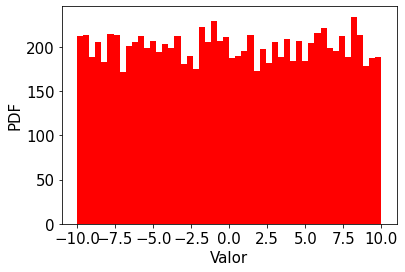

M√©dia da distribui√ß√£o: -3.4207923870875456


In [20]:
distribuicao = np.random.uniform(low=-10, high=+10, size=10000) 
#Distribui√ß√£o aleat√≥ria e uniforme
plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print ('M√©dia da distribui√ß√£o: '+str(distribuicao[np.random.randint(0, 10000, 2)].mean()))

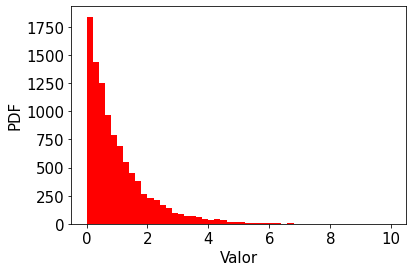

In [23]:
distribuicao = np.random.exponential(scale=+1, size=10000)

plt.hist(distribuicao, color='red', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Perceba que estamos sorteando numeros aleat√≥rios que est√£o 'presos' em dado limite (nos casos, casosda distribui√ß√£o segue uma fun√ß√£o diferente). A partir desses dados, podemos comparar o que esperamos de uma distribui√ß√£o, por exemplo, exponencial e comparar com nossos dados (digamos que temos algo que se assemelhe com uma exponencial, gostariamos de saber o qu√£o diferente ela est√° de dados aleatorios que sigam a mesma distribui√ß√£o). Um bom exemplo do quanto este m√©todo pode ser √∫til √© **agulha de Buffon**, um m√©todo desenvolvido no s√©culo XVIII para o c√°lculo do *pi* a partir de numeros aleat√≥rios. O m√©todo de Monte Carlo torna o exercicio trivial.

N√£o √© surpresa perceber que o m√©todo Monte Carlo √© muito √∫til para analisar dados do passado e predizer o futuro. Ela √© usada para estimar os poss√≠veis resultados de um evento incerto. Sendo o **acaso** o principal elemento da abordagem deste tipo de modelagem. 

Imagine que, por exemplo, desejamos conhecer os pre√ßos de certa mercadoria no passado, e tentar aplicar alguma equa√ß√£o que possa predizer sua varia√ß√£o no futuro. Com dados suficientes, √© poss√≠vel estimar um valor com certa precis√£o.

>Algo como pre√ßo_de_hoje = pre√ßo_de_ontem * $e^{r}$
>> Bastando achar o r com base num banco de dados, e, posteriormente, simular v√°rias varia√ß√µes diferentes do pre√ßo da mesma mercadoria.

Vejamos um exemplo de como este m√©todo √© utilizado no mercado financeiro.

>> Tenho uma carteira com 5 a√ß√µes. Dado a distribui√ß√£o dos retornos dessa carteira no √∫ltimo ano, qual ser√° o m√°ximo de preju√≠zo que posso sofrer nos pr√≥ximos 3 anos (confian√ßa de 95%) e qual a probabilidade de eu obter lucro?

A solu√ß√£o se faz em simular 10.000 cen√°rios da carteira com 5 a√ß√µes nos pr√≥ximos 3 anos e criar uma dritribui√ß√£o de retornos com os cen√°rios. Para isso, vamos utilizar Monte Carlo.

In [19]:
#Obtendo dados

lista_acoes = ['WEGE3','PCAR3','LREN3','PETR4','VALE3'] #pegando as a√ß√µes mais famosas da bolsa
lista_acoes = [acao + ".SA" for acao in lista_acoes] #para conseguir puxar os dados da yfinance

#data_final = dt.datetime.now()
#data_inicial = data_final - dt.timedelta(days=300)
#precos = pdr.get_data_yahoo(lista_acoes, data_inicial, data_final)['Adj Close'] 

#|_> n√£o funcionou, provavelmente devido a m√° compatibilidade com as variaveis de tempo e a API yahoo

data_final = pd.Timestamp.today()
data_inicial = data_final - pd.DateOffset(months=12)

precos = yf.download(lista_acoes, start=data_inicial, end=data_final)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [21]:
retornos = precos.pct_change().dropna()
media_retornos = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))
numero_acoes = len(lista_acoes)

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [22]:
retornos

LREN3.SA  PCAR3.SA  PETR4.SA  VALE3.SA  WEGE3.SA
Date                                                        
2022-04-05 -0.048656  0.010972 -0.009480 -0.028895 -0.011136
2022-04-06 -0.032546 -0.002713 -0.000926  0.015140 -0.008663
2022-04-07 -0.008503 -0.003887  0.051916  0.006007 -0.006117
2022-04-08 -0.003356 -0.003121  0.004994 -0.020385  0.000586
2022-04-11  0.000748 -0.022309 -0.007600 -0.012086 -0.046573
...              ...       ...       ...       ...       ...
2023-03-29 -0.048685  0.016621  0.013141  0.014363  0.008702
2023-03-30  0.037647  0.023161  0.002929  0.016271  0.003115
2023-03-31 -0.060658 -0.019308 -0.021694 -0.018700 -0.031295
2023-04-03 -0.070006 -0.004073  0.044350  0.000249 -0.023674
2023-04-04  0.003245 -0.010225 -0.008167 -0.026771  0.003284

[251 rows x 5 columns]

In [23]:
media_retornos

LREN3.SA   -0.002035
PCAR3.SA   -0.001722
PETR4.SA    0.001293
VALE3.SA   -0.000352
WEGE3.SA    0.000781
dtype: float64

- Mini-aula:

>Retornos sint√©ticos = m√©dia dos retornos + Rpdf x L

>>Rpdf = Matriz aleat√≥ria gerada por uma fun√ß√£o de densidade de probabilidade. No Mercado utilizamos muito a distribui√ß√£o normal.

>>L = Matriz triangular inferior proveniente de uma decomposi√ß√£o de Cholesky, usando como base a matriz covariancia.

Iremos assumir que a distribui√ß√£o de retornos √© uma distribui√ß√£o normal multivariada. Basicamente iremos pegar a m√©dia de retorno de cada a√ß√£o e somar valores aleat√≥rios com base no quanto flutuou no ultimo ano. No entanto, cada vetor_retorno de cada a√ß√£o √© correlacionado uma com as outras. Isso significa que nossos valores aleat√≥rios precisam respeitar essa correla√ß√£o, para que a previs√£o fa√ßa sentido (por isso utilizamos a matriz **L**).

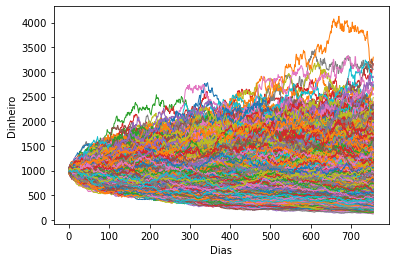

In [27]:
## premissas montecarlo

numero_simulacoes = 10000
dias_projetados = 252*3 #252 dias uteis
capital_inicial = 1000 #o que vai ocorrer com 1000 reais?

#gerando retorno medio em forma de matriz

retorno_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retorno_medio*np.ones(shape = (dias_projetados,numero_acoes))

#Nossa matriz L

L = LA.cholesky(matriz_covariancia)

#Gerando simula√ß√µes

retornos_carteira = np.zeros([dias_projetados, numero_simulacoes])
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    
    Rpdf = np.random.normal(size = (dias_projetados, numero_acoes))
    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L) #Unico parametro aleatorio √© Rpdf
    
    retornos_carteira[:,s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1) * capital_inicial
    montante_final[s] = retornos_carteira[-1,s]
    
## Visualizando o retorno em 10.000 'realidades diferentes'
plt.plot(retornos_carteira,linewidth = 1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [45]:
#Criando as estat√≠sticas para a nossa an√°lise de carteira

montante_99 = str(np.percentile(montante_final,1))
montante_95 = str(np.percentile(montante_final,5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str(round((len(montante_final[montante_final > 1000])/len(montante_final))*100,2))+"%"

print("Ao investir R$ 1000,00 na carteira " + str(lista_acoes), "o resultado esperado para os pr√≥ximos 3 anos, seguindo o m√©todo Monte Carlo com 10.000 simula√ß√µes: \n")
print("50% de chance do montante ser maior que R$"+str(montante_mediano))
print("95% de chance do montante ser maior que R$"+str(montante_95))
print("99% de chance do montante ser maior que R$"+str(montante_99))
print("Cen√°rios com lucro: "+str(cenarios_com_lucro))


Ao investir R$ 1000,00 na carteira ['WEGE3.SA', 'PCAR3.SA', 'LREN3.SA', 'PETR4.SA', 'VALE3.SA'] o resultado esperado para os pr√≥ximos 3 anos, seguindo o m√©todo Monte Carlo com 10.000 simula√ß√µes: 

50% de chance do montante ser maior que R$662.8306288879071
95% de chance do montante ser maior que R$325.3332369670531
99% de chance do montante ser maior que R$239.16887545699646
Cen√°rios com lucro: 17.63%


A partir dessas m√©tricas, √© poss√≠vel calcular VAR da carteira para diferentes intervalos de confian√ßa e medir se o risco que iremos correr √© compat√≠vel com o que aguentamos perder. Esta √© s√≥ uma das utilidades do Monte Carlo.

## Final

Em conclus√£o, a estat√≠stica e a programa√ß√£o s√£o habilidades essenciais para a an√°lise de dados em diversos campos, desde **a astrof√≠sica at√© o mercado financeiro**. √â fundamental entender os conceitos estat√≠sticos e ter habilidades em programa√ß√£o para extrair informa√ß√µes valiosas dos dados e tomar decis√µes informadas.

Atrav√©s deste guia, espero ter oferecido uma revis√£o clara e concisa desses t√≥picos, com exemplos relevantes e esclarecedores. Agrade√ßo a aten√ß√£o! 

Qualquer d√∫vida ou sugest√£o, mande-me e-mail: thiagolaidler@gmail.com

In [1]:
######## Conversor para PDF #################
#!jupyter nbconvert --to webpdf --allow-chromium-download S√≠ntese_Estat√≠stica.ipynb

[NbConvertApp] Converting notebook S√≠ntese_Estat√≠stica.ipynb to webpdf
[NbConvertApp] Writing 862976 bytes to S√≠ntese_Estat√≠stica.pdf


**Refer√™ncias:**
>    Aulas do prof Bruno Morgado OV-UFRJ

>    (Cambridge) J.V. Wall, C. R. Jenkins - Practical Statistics for Astronomers (2003)

>    Jo√£o Ismael, Estat√≠stica b√°sica a arte de trabalhar com dados (2009)

>    P.Morettin, Estat√≠stica B√°sica (2010)

>    Charles Wheelan, Estat√≠stica, o que √©, para que serve, como funciona.

>    Leonard Mlodinow, O Andar do B√™bado - Como o Acaso Determina Nossas Vidas
    